# Projet 8: [Communiquez vos résultats](#M0)

# Analyse de certains déterminants à l'octroi de crédits bancaires destinés aux particuliers.

# Table des matières  <a id="sommaire" name="sommaire"></a>

**[Mission 1 - Description des données](#M1)**
- [1. Nettoyage des données](#M11)
    - [a) Valeurs aberrantes](#M111)
    - [b) Valeurs qualitatives manquantes](#M112)
    - [c) Valeurs quantitatives manquantes](#M113)
- [2. Analyses univariées et bivariées](#M12)
    - [a) Analyses univariées](#M121)
    - [b) Analyses bivariées](#M122)
    - [c) Corrélation entre variables](#M123)
        - [i) Sur l'ensemble des prêts](#M1231)
        - [ii) En fonction de la notation crédit](#M1232)
        
**[Mission 2 - Analyse exploratoire des données](#M2)**
- [1. Détermination du nombre de composantes principales](#M21)
    - [a) Etude de l'inertie](#M211)
- [2. Analyse des Correspondances Multiples](#M22)
    - [a) Plan factoriel de dimension 1 et 3](#M221)
    - [b) Plan factoriel de dimension 3 et 4](#M222)
    
**[Mission 3 - Analyse prédictive](#M3)**
- [1. Modélisation à l'aide d'une régression logistique multiple à variable binaire](#M31)
    - [a) Modélisation](#M311)
    - [b) Calcul des odd-ratios](#M312)
    - [c) Évaluation statistique de la régression](#M313)
    - [d) Courbe ROC](#M314)
- [2. Test de notation du crédit](#M32)
    - [a) Programme](#M321)
    - [b) Essai](#M322)
    - [c) Simulation](#M323)
        - [i) Netoyage des données](#M3231)
        - [ii) Test](#M3232)

In [1]:
library(tibble)
library(dplyr) 
library(tidyr)
library(FactoMineR) 
library(factoextra) 
library(ggplot2)  
library(corrplot) # Matrice de corrélation
library(repr) 
library(reshape2)
library(EnvStats) 
library(normtest) # Test de normalité
library(Hmisc) # matrice de corrélations
library(devtools)
library(ggpubr)
library(ggcorrplot) # Graphe de corrélation
library(stats)
library(fpc)
library(caret) # matrice de confusion et validation croisée, analyse prédictive (modélisation)
library(MASS) # modèle pas à pas basé sur le critère d'Akaïke
library(pROC) # courbe ROC

Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'FactoMineR' was built under R version 3.6.3"Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'reshape2' was built under R version 3.6.3"
Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Warning message

In [2]:
options(repr.matrix.max.rows = 15, repr.matrix.max.cols = 20)

<a href="#sommaire">Retour au sommaire</a>
# Mission 1 - Description des données.<a name="M1"></a>

In [3]:
train <- read.csv('Fichier/train.csv', encoding = 'UTF-8')
dim(train)
train

[1] 614  13

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP001002,Male,No,0,Graduate,No,5849,0,NA,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002964,Male,Yes,2,Not Graduate,No,3987,1411,157,360,1,Rural,Y


In [4]:
str(train)

'data.frame':	614 obs. of  13 variables:
 $ Loan_ID          : Factor w/ 614 levels "LP001002","LP001003",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Gender           : Factor w/ 3 levels "","Female","Male": 3 3 3 3 3 3 3 3 3 3 ...
 $ Married          : Factor w/ 3 levels "","No","Yes": 2 3 3 3 2 3 3 3 3 3 ...
 $ Dependents       : Factor w/ 5 levels "","0","1","2",..: 2 3 2 2 2 4 2 5 4 3 ...
 $ Education        : Factor w/ 2 levels "Graduate","Not Graduate": 1 1 1 2 1 1 2 1 1 1 ...
 $ Self_Employed    : Factor w/ 3 levels "","No","Yes": 2 2 3 2 2 3 2 2 2 2 ...
 $ ApplicantIncome  : int  5849 4583 3000 2583 6000 5417 2333 3036 4006 12841 ...
 $ CoapplicantIncome: num  0 1508 0 2358 0 ...
 $ LoanAmount       : int  NA 128 66 120 141 267 95 158 168 349 ...
 $ Loan_Amount_Term : int  360 360 360 360 360 360 360 360 360 360 ...
 $ Credit_History   : int  1 1 1 1 1 1 1 0 1 1 ...
 $ Property_Area    : Factor w/ 3 levels "Rural","Semiurban",..: 3 1 3 3 3 3 3 2 3 2 ...
 $ Loan_Status      : Factor w/ 2 le

Il semble étonnant que Credit_History soit classée entier. Nous la classons en facteur à deux niveaux (1 = oui et 0 = non).

In [5]:
train$Credit_History <- droplevels(as.factor(train$Credit_History))

<a href="#sommaire">Retour au sommaire</a>
## <span style='color:blue'>1. Nettoyage des données.<a name="M11"></a>

In [6]:
summary(train)

     Loan_ID       Gender    Married   Dependents        Education  
 LP001002:  1         : 13      :  3     : 15     Graduate    :480  
 LP001003:  1   Female:112   No :213   0 :345     Not Graduate:134  
 LP001005:  1   Male  :489   Yes:398   1 :102                       
 LP001006:  1                          2 :101                       
 LP001008:  1                          3+: 51                       
 LP001011:  1                                                       
 (Other) :608                                                       
 Self_Employed ApplicantIncome CoapplicantIncome   LoanAmount   
    : 32       Min.   :  150   Min.   :    0     Min.   :  9.0  
 No :500       1st Qu.: 2878   1st Qu.:    0     1st Qu.:100.0  
 Yes: 82       Median : 3812   Median : 1188     Median :128.0  
               Mean   : 5403   Mean   : 1621     Mean   :146.4  
               3rd Qu.: 5795   3rd Qu.: 2297     3rd Qu.:168.0  
               Max.   :81000   Max.   :41667     Max.   :7

CCL: Il semble y avoir deux valeurs aberrantes (ApplicantIncome et CoapplicantIncome).

<a href="#sommaire">Retour au sommaire</a>
## <span style='color:brown'>a) Valeurs aberrantes.<a name="M111"></a>

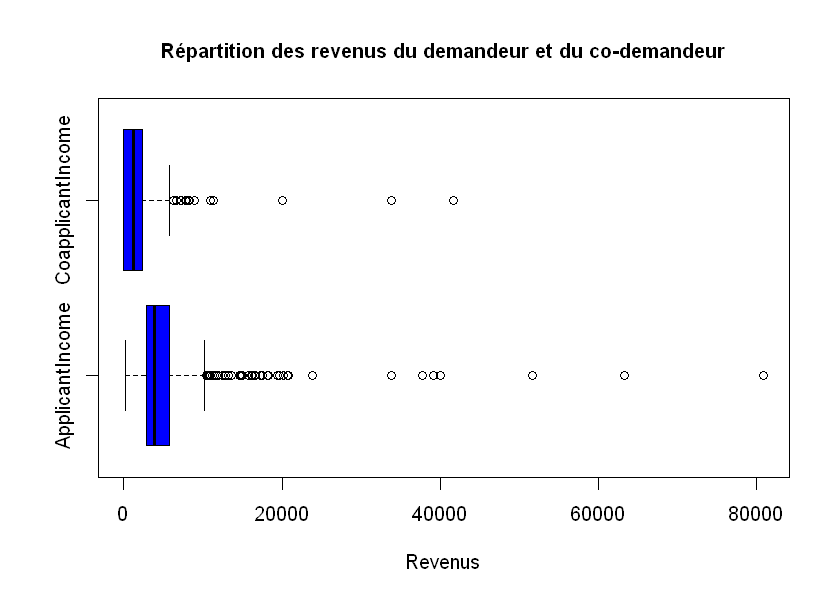

In [7]:
options(repr.plot.width = 7, repr.plot.height = 5)
boxplot(train[, c('ApplicantIncome', 'CoapplicantIncome')], xlab = 'Revenus', ylab = '', col = 'blue', 
        horizontal = T, cex.main = 1, main = 'Répartition des revenus du demandeur et du co-demandeur')

In [8]:
train[train$ApplicantIncome == 81000, ]
train[train$CoapplicantIncome == 41667, ]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
410,LP002317,Male,Yes,3+,Graduate,No,81000,0,360,360,0,Rural,N


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
601,LP002949,Female,No,3+,Graduate,,416,41667,350,180,NA,Urban,N


CCL:
- Bien que ces valeurs soient extrêmes, nous ne les considèrerons pas comme aberrantes.
- Il apparait que ces clients n'ont pas obtenu leur prêt malgré des revenus 20 fois supérieur à la moyenne. Les modalités d'obtention du modèle employé par la banque montrent qe ce critère ne rentre pas en jeu. 

In [9]:
# Existence de doublons avec l'identifiant, sans l'identifiant et sans l'identifiant et la notation du crédit:
sum(duplicated(train))
sum(duplicated(train[, -1]))
sum(duplicated(train[, -c(1, 13)]))

[1] 0

[1] 0

[1] 0

CCL: Pas de données clients en double.

<a href="#sommaire">Retour au sommaire</a>
## <span style='color:brown'>b) Valeurs qualitatives manquantes.<a name="M112"></a>

### Colonne 'Genre':

In [10]:
train[train$Gender == '', ]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
24,LP001050,,Yes,2,Not Graduate,No,3365,1917,112,360,0,Rural,N
127,LP001448,,Yes,3+,Graduate,No,23803,0,370,360,1,Rural,Y
172,LP001585,,Yes,3+,Graduate,No,51763,0,700,300,1,Urban,Y
189,LP001644,,Yes,0,Graduate,Yes,674,5296,168,360,1,Rural,Y
315,LP002024,,Yes,0,Graduate,No,2473,1843,159,360,1,Rural,N
335,LP002103,,Yes,1,Graduate,Yes,9833,1833,182,180,1,Urban,Y
461,LP002478,,Yes,0,Graduate,Yes,2083,4083,160,360,NA,Semiurban,Y
468,LP002501,,Yes,0,Graduate,No,16692,0,110,360,1,Semiurban,Y
478,LP002530,,Yes,2,Graduate,No,2873,1872,132,360,0,Semiurban,N
508,LP002625,,No,0,Graduate,No,3583,0,96,360,1,Urban,N


In [11]:
# Suppression et réorganisation:
train <- train[-which(train$Gender == ''), ]
train <- train[order(train$Loan_ID), ]

# Suppression du level inutile:
train$Gender <- droplevels(train$Gender)

dim(train)

[1] 601  13

In [12]:
# Vérification de la suppression des valeurs manquantes de la colonne Gender et du level inutilisé:
summary(train)

     Loan_ID       Gender    Married   Dependents        Education  
 LP001002:  1   Female:112      :  3     : 15     Graduate    :468  
 LP001003:  1   Male  :489   No :210   0 :338     Not Graduate:133  
 LP001005:  1                Yes:388   1 :101                       
 LP001006:  1                          2 : 99                       
 LP001008:  1                          3+: 48                       
 LP001011:  1                                                       
 (Other) :595                                                       
 Self_Employed ApplicantIncome CoapplicantIncome   LoanAmount   
    : 32       Min.   :  150   Min.   :    0     Min.   :  9.0  
 No :491       1st Qu.: 2882   1st Qu.:    0     1st Qu.:100.0  
 Yes: 78       Median : 3813   Median : 1167     Median :127.0  
               Mean   : 5297   Mean   : 1625     Mean   :145.0  
               3rd Qu.: 5746   3rd Qu.: 2306     3rd Qu.:166.5  
               Max.   :81000   Max.   :41667     Max.   :6

### Colonne 'Marié':

In [13]:
train[train$Married == '', ]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
105,LP001357,Male,,,Graduate,No,3816,754,160,360,1,Urban,Y
229,LP001760,Male,,,Graduate,No,4758,0,158,480,1,Semiurban,Y
436,LP002393,Female,,,Graduate,No,10047,0,NA,240,1,Semiurban,Y


In [14]:
# Suppression et réorganisation:
train <- train[-which(train$Married == ''), ]
train <- train[order(train$Loan_ID), ]

# Suppression du level inutile:
train$Married <- droplevels(train$Married)

dim(train)

[1] 598  13

### Colonne 'Personne à charge':

In [15]:
train[train$Dependents == '', ]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
103,LP001350,Male,Yes,,Graduate,No,13650,0,NA,360,1,Urban,Y
121,LP001426,Male,Yes,,Graduate,No,5667,2667,180,360,1,Rural,Y
227,LP001754,Male,Yes,,Not Graduate,Yes,4735,0,138,360,1,Urban,N
294,LP001945,Female,No,,Graduate,No,5417,0,143,480,0,Urban,N
302,LP001972,Male,Yes,,Not Graduate,No,2875,1750,105,360,1,Semiurban,Y
333,LP002100,Male,No,,Graduate,No,2833,0,71,360,1,Urban,Y
336,LP002106,Male,Yes,,Graduate,Yes,5503,4490,70,NA,1,Semiurban,Y
347,LP002130,Male,Yes,,Not Graduate,No,3523,3230,152,360,0,Rural,N
356,LP002144,Female,No,,Graduate,No,3813,0,116,180,1,Urban,Y
518,LP002682,Male,Yes,,Not Graduate,No,3074,1800,123,360,0,Semiurban,N


In [16]:
# Suppression et réorganisation:
train <- train[-which(train$Dependents == ''), ]
train <- train[order(train$Loan_ID), ]

# Suppression du level inutile:
train$Dependents <- droplevels(factor(train$Dependents))

dim(train)

[1] 586  13

### Colonne 'Travailleur indépendant':

In [17]:
train[train$Self_Employed == '', ]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
12,LP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y
20,LP001041,Male,Yes,0,Graduate,,2600,3500,115,NA,1,Urban,Y
25,LP001052,Male,Yes,1,Graduate,,3717,2925,151,360,NA,Semiurban,N
30,LP001087,Female,No,2,Graduate,,3750,2083,120,360,1,Semiurban,Y
31,LP001091,Male,Yes,1,Graduate,,4166,3369,201,360,NA,Urban,N
96,LP001326,Male,No,0,Graduate,,6782,0,NA,360,NA,Urban,N
108,LP001370,Male,No,0,Not Graduate,,7333,0,120,360,1,Rural,N
112,LP001387,Female,Yes,0,Graduate,,2929,2333,139,360,1,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,LP002489,Female,No,1,Not Graduate,,5191,0,132,360,1,Semiurban,Y


In [18]:
# Regroupement et réorganisation:
train <- train[-which(train$Self_Employed == ''), ]
train <- train[order(train$Loan_ID), ]

# Suppression du level inutile:
train$Self_Employed <- droplevels(train$Self_Employed)

dim(train)

[1] 554  13

In [19]:
summary(train)

     Loan_ID       Gender    Married   Dependents        Education  
 LP001002:  1   Female:101   No :192   0 :319     Graduate    :431  
 LP001003:  1   Male  :453   Yes:362   1 : 95     Not Graduate:123  
 LP001005:  1                          2 : 94                       
 LP001006:  1                          3+: 46                       
 LP001008:  1                                                       
 LP001011:  1                                                       
 (Other) :548                                                       
 Self_Employed ApplicantIncome CoapplicantIncome   LoanAmount   
 No :478       Min.   :  150   Min.   :    0     Min.   :  9.0  
 Yes: 76       1st Qu.: 2844   1st Qu.:    0     1st Qu.:100.0  
               Median : 3840   Median : 1149     Median :127.0  
               Mean   : 5267   Mean   : 1586     Mean   :144.9  
               3rd Qu.: 5819   3rd Qu.: 2297     3rd Qu.:170.0  
               Max.   :81000   Max.   :33837     Max.   :6

<a href="#sommaire">Retour au sommaire</a>
## <span style='color:brown'>c) Valeurs quantitatives manquantes.<a name="M113"></a>

In [20]:
str(train)

'data.frame':	554 obs. of  13 variables:
 $ Loan_ID          : Factor w/ 614 levels "LP001002","LP001003",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Gender           : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Married          : Factor w/ 2 levels "No","Yes": 1 2 2 2 1 2 2 2 2 2 ...
 $ Dependents       : Factor w/ 4 levels "0","1","2","3+": 1 2 1 1 1 3 1 4 3 2 ...
 $ Education        : Factor w/ 2 levels "Graduate","Not Graduate": 1 1 1 2 1 1 2 1 1 1 ...
 $ Self_Employed    : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 2 1 1 1 1 ...
 $ ApplicantIncome  : int  5849 4583 3000 2583 6000 5417 2333 3036 4006 12841 ...
 $ CoapplicantIncome: num  0 1508 0 2358 0 ...
 $ LoanAmount       : int  NA 128 66 120 141 267 95 158 168 349 ...
 $ Loan_Amount_Term : int  360 360 360 360 360 360 360 360 360 360 ...
 $ Credit_History   : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 1 2 2 ...
 $ Property_Area    : Factor w/ 3 levels "Rural","Semiurban",..: 3 1 3 3 3 3 3 2 3 2 ...
 $ Loan_Status      : F

In [21]:
# Valeurs quantitatives manquantes:
sapply(train, function(x) sum(is.na(x)))

Loan_ID            Gender           Married        Dependents 
                0                 0                 0                 0 
        Education     Self_Employed   ApplicantIncome CoapplicantIncome 
                0                 0                 0                 0 
       LoanAmount  Loan_Amount_Term    Credit_History     Property_Area 
               19                12                43                 0 
      Loan_Status 
                0

In [22]:
train <- train[complete.cases(train[, 9:11]), ] # élimine les valeurs manquantes des colonnes sélectionnées
rownames(train) <- 1:nrow(train)
dim(train)

[1] 480  13

CCL: On a perdu 134 clients dans le nettoyage soit presque 22%.

In [23]:
# Vérification:
summary(train)

     Loan_ID       Gender    Married   Dependents        Education  
 LP001003:  1   Female: 86   No :169   0 :274     Graduate    :383  
 LP001005:  1   Male  :394   Yes:311   1 : 80     Not Graduate: 97  
 LP001006:  1                          2 : 85                       
 LP001008:  1                          3+: 41                       
 LP001011:  1                                                       
 LP001013:  1                                                       
 (Other) :474                                                       
 Self_Employed ApplicantIncome CoapplicantIncome   LoanAmount   
 No :414       Min.   :  150   Min.   :    0     Min.   :  9.0  
 Yes: 66       1st Qu.: 2899   1st Qu.:    0     1st Qu.:100.0  
               Median : 3859   Median : 1084     Median :128.0  
               Mean   : 5364   Mean   : 1581     Mean   :144.7  
               3rd Qu.: 5852   3rd Qu.: 2253     3rd Qu.:170.0  
               Max.   :81000   Max.   :33837     Max.   :6

On fractionne de 10% le dataset 'train' afin d'en créer un nouveau, dans le but uniquement de tester la fiabilité de la modélisation avec des clients "nouveaux" et des notations de crédit connus d'avance.
On scinde de la 'quantité' voulue de lignes-clients le jeu de donnée et on ne procède pas par randomisation pour ne pas modifer les paramètres de la modélisation par la suite.

In [24]:
essai <- train[431:480, ]
train <- train[1:430, ]

In [25]:
dim(train)

[1] 430  13

In [26]:
dim(essai)

[1] 50 13

In [27]:
table(essai$Loan_Status)


 N  Y 
15 35 

In [28]:
head(essai)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
431,LP002785,Male,Yes,1,Graduate,No,3333,3250,158,360,1,Urban,Y
432,LP002788,Male,Yes,0,Not Graduate,No,2454,2333,181,360,0,Urban,N
433,LP002789,Male,Yes,0,Graduate,No,3593,4266,132,180,0,Rural,N
434,LP002792,Male,Yes,1,Graduate,No,5468,1032,26,360,1,Semiurban,Y
435,LP002795,Male,Yes,3+,Graduate,Yes,10139,0,260,360,1,Semiurban,Y
436,LP002798,Male,Yes,0,Graduate,No,3887,2669,162,360,1,Semiurban,Y


<a href="#sommaire">Retour au sommaire</a>
## <span style='color:blue'>2. Analyses univariées et bivariées.<a name="M12"></a>
## <span style='color:brown'>a) Analyses univariées.<a name="M121"></a>

### Gender:

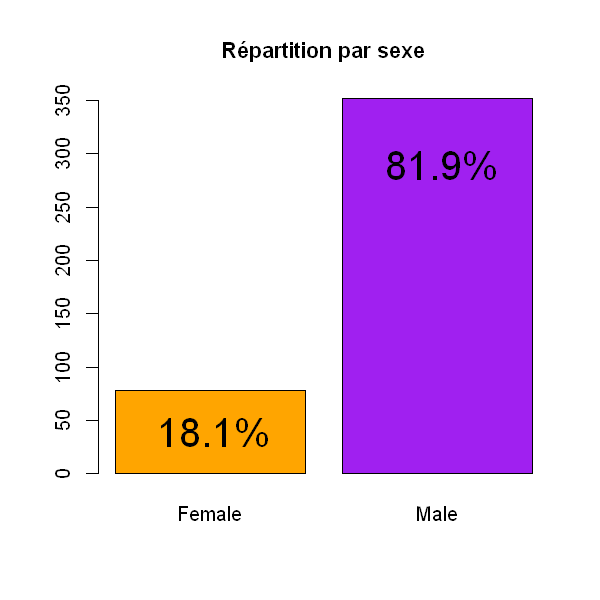

In [29]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(train$Gender, col = c('orange', 'purple'), cex.main = 1.1, main = 'Répartition par sexe')
text(0.725, 40, sprintf('%s%%', round(prop.table(table(train$Gender))*100, 1)[1]), cex = 2)
text(1.925, 290, sprintf('%s%%', round(prop.table(table(train$Gender))*100, 1)[2]), cex = 2)

### Married:

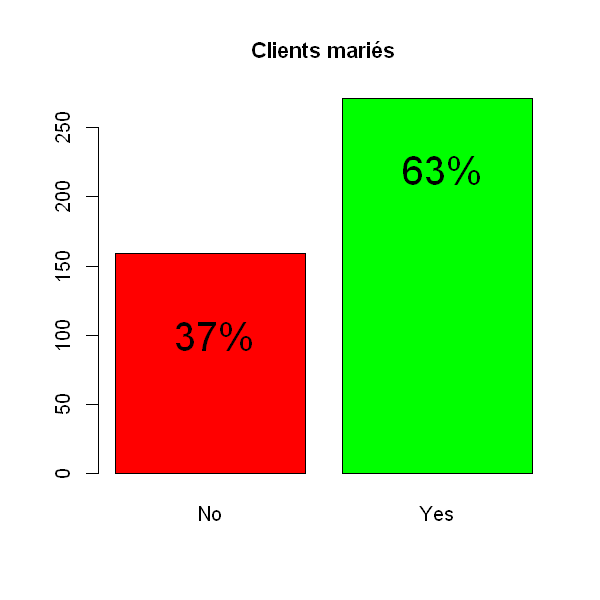

In [30]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(train$Married, col = c('red', 'green'), cex.main = 1.1, main = 'Clients mariés')
text(0.725, 100, sprintf('%s%%', round(prop.table(table(train$Married))*100, 1)[1]), cex = 2)
text(1.925, 220, sprintf('%s%%', round(prop.table(table(train$Married))*100, 1)[2]), cex = 2)

### Dependents:

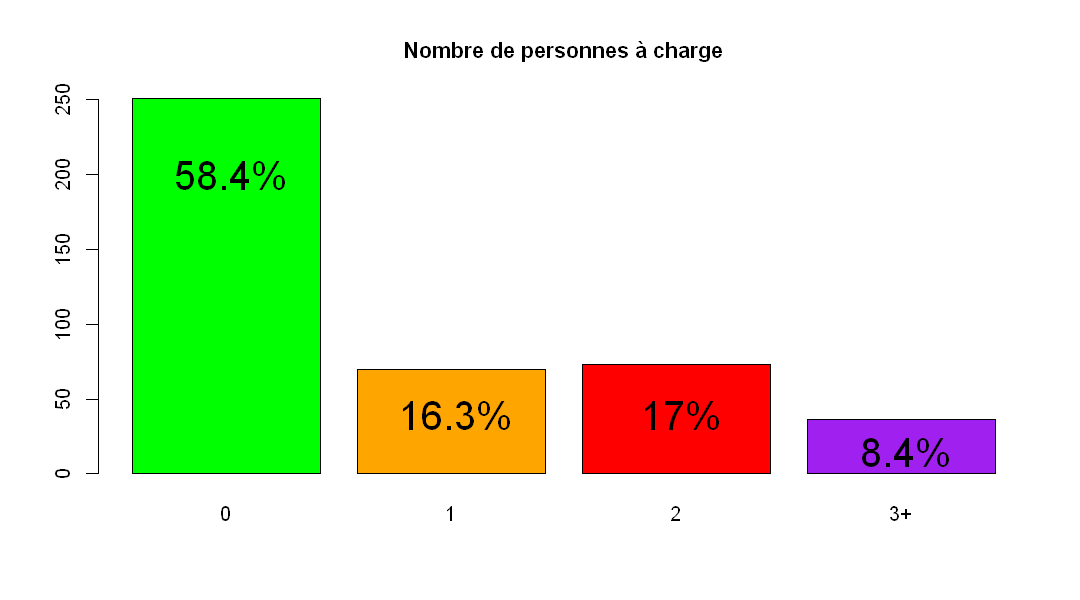

In [31]:
options(repr.plot.width = 9, repr.plot.height = 5)
plot(train$Dependents, col = c('green', 'orange', 'red', 'purple'), cex.main = 1.1, main = 'Nombre de personnes à charge')
text(0.725, 200, sprintf('%s%%', round(prop.table(table(train$Dependents))*100, 1)[1]), cex = 2)
text(1.925, 40, sprintf('%s%%', round(prop.table(table(train$Dependents))*100, 1)[2]), cex = 2)
text(3.125, 40, sprintf('%s%%', round(prop.table(table(train$Dependents))*100, 1)[3]), cex = 2)
text(4.325, 15, sprintf('%s%%', round(prop.table(table(train$Dependents))*100, 1)[4]), cex = 2)

### Education:

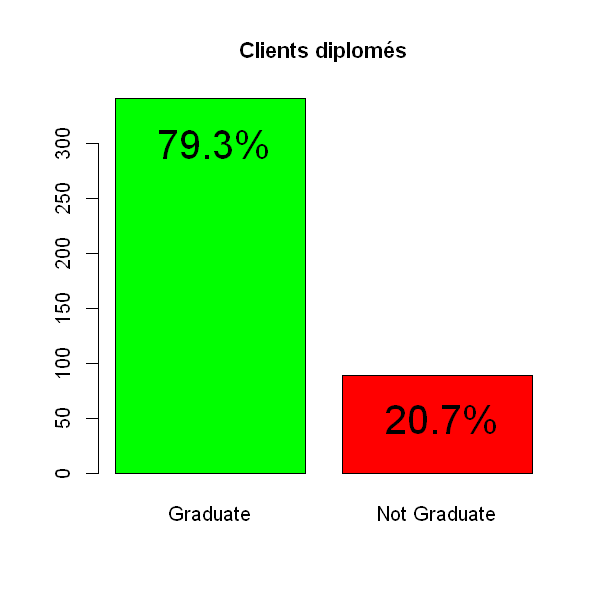

In [32]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(train$Education, col = c('green', 'red'), cex.main = 1.1, main = 'Clients diplomés')
text(0.725, 300, sprintf('%s%%', round(prop.table(table(train$Education))*100, 1)[1]), cex = 2)
text(1.925, 50, sprintf('%s%%', round(prop.table(table(train$Education))*100, 1)[2]), cex = 2)

### Self_Employed:

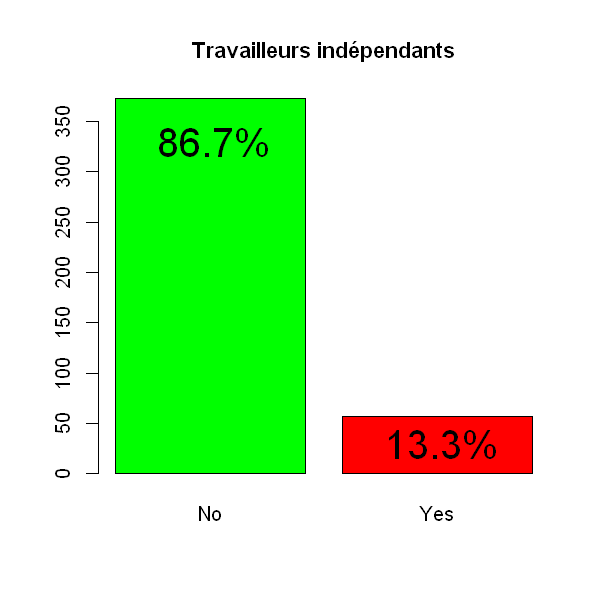

In [33]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(train$Self_Employed, col = c('green', 'red'), cex.main = 1.1, main = 'Travailleurs indépendants')
text(0.725, 330, sprintf('%s%%', round(prop.table(table(train$Self_Employed))*100, 1)[1]), cex = 2)
text(1.925, 30, sprintf('%s%%', round(prop.table(table(train$Self_Employed))*100, 1)[2]), cex = 2)

### Loan_Amount_Term:

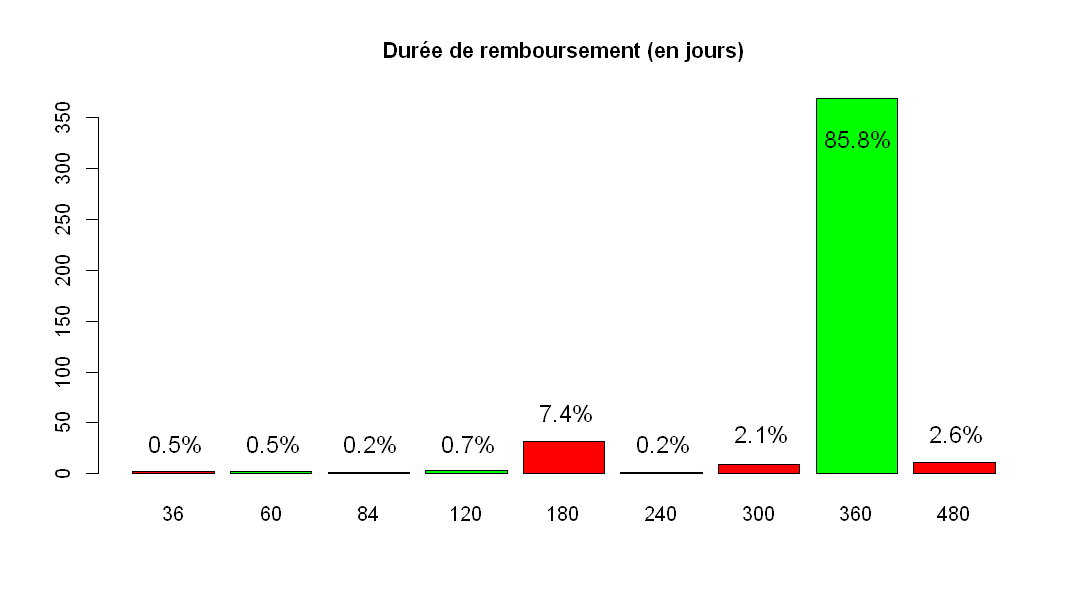

In [34]:
options(repr.plot.width = 9, repr.plot.height = 5)
copy <- train
copy$Loan_Amount_Term <- factor(copy$Loan_Amount_Term)
plot(copy$Loan_Amount_Term, col = c('red', 'green'), cex.main = 1.1, main = 'Durée de remboursement (en jours)')
text(0.725, 30, sprintf('%s%%', round(prop.table(table(train$Loan_Amount_Term))*100, 1)[1]), cex = 1.2)
text(1.925, 30, sprintf('%s%%', round(prop.table(table(train$Loan_Amount_Term))*100, 1)[2]), cex = 1.2)
text(3.125, 30, sprintf('%s%%', round(prop.table(table(train$Loan_Amount_Term))*100, 1)[3]), cex = 1.2)
text(4.325, 30, sprintf('%s%%', round(prop.table(table(train$Loan_Amount_Term))*100, 1)[4]), cex = 1.2)
text(5.525, 60, sprintf('%s%%', round(prop.table(table(train$Loan_Amount_Term))*100, 1)[5]), cex = 1.2)
text(6.725, 30, sprintf('%s%%', round(prop.table(table(train$Loan_Amount_Term))*100, 1)[6]), cex = 1.2)
text(7.925, 40, sprintf('%s%%', round(prop.table(table(train$Loan_Amount_Term))*100, 1)[7]), cex = 1.2)
text(9.125, 330, sprintf('%s%%', round(prop.table(table(train$Loan_Amount_Term))*100, 1)[8]), cex = 1.2)
text(10.325, 40, sprintf('%s%%', round(prop.table(table(train$Loan_Amount_Term))*100, 1)[9]), cex = 1.2)

### Credit_History:

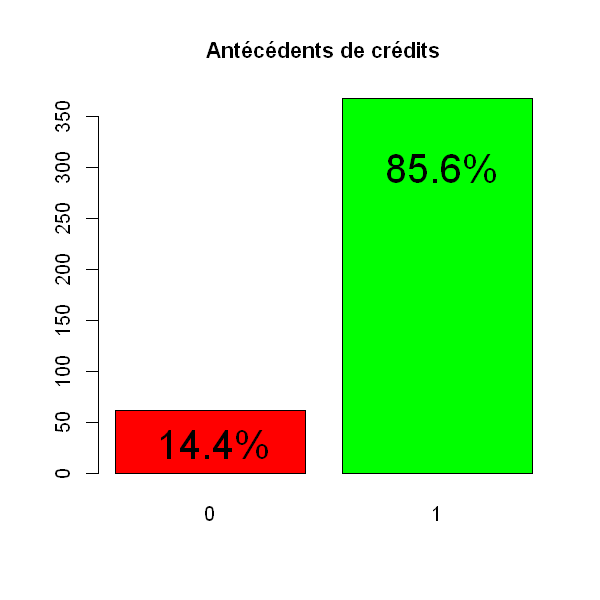

In [35]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(train$Credit_History, col = c('red', 'green'), cex.main = 1.1, main = 'Antécédents de crédits')
text(0.725, 30, sprintf('%s%%', round(prop.table(table(train$Credit_History))*100, 1)[1]), cex = 2)
text(1.925, 300, sprintf('%s%%', round(prop.table(table(train$Credit_History))*100, 1)[2]), cex = 2)

### Property_Area:

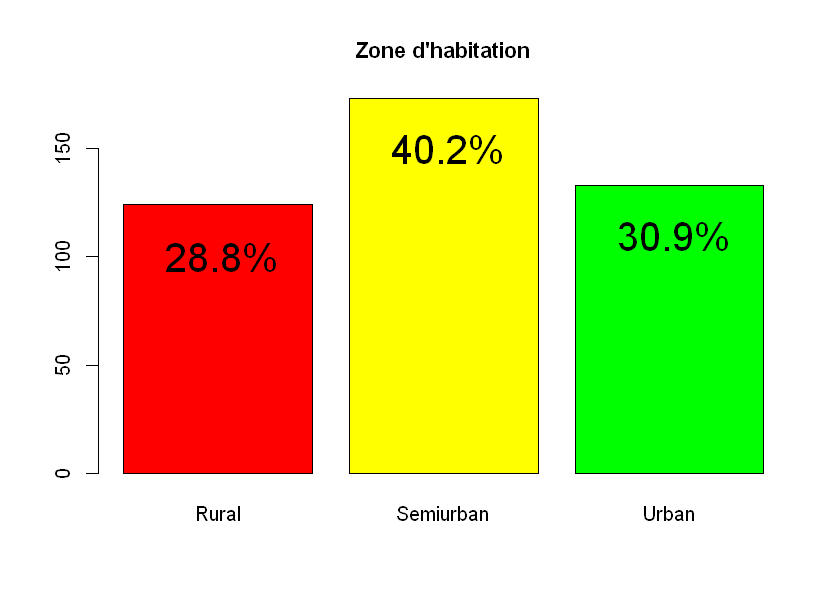

In [36]:
options(repr.plot.width = 7, repr.plot.height = 5)
plot(train$Property_Area, col = c('red', 'yellow', 'green'), cex.main = 1.1, main = 'Zone d\'habitation')
text(0.725, 100, sprintf('%s%%', round(prop.table(table(train$Property_Area))*100, 1)[1]), cex = 2)
text(1.925, 150, sprintf('%s%%', round(prop.table(table(train$Property_Area))*100, 1)[2]), cex = 2)
text(3.125, 110, sprintf('%s%%', round(prop.table(table(train$Property_Area))*100, 1)[3]), cex = 2)

### Loan_Status:

In [37]:
table(train$Loan_Status)


  N   Y 
133 297 

On a 148 refus de prêt et 332 accords de prêts.

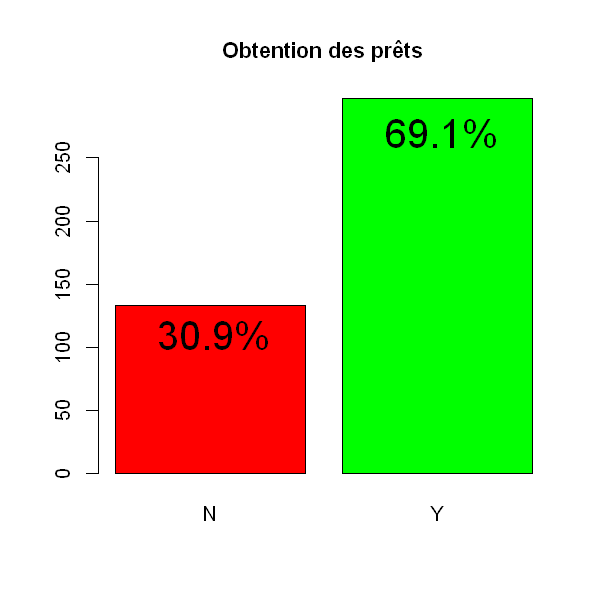

In [38]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(train$Loan_Status, col = c('red', 'green'), cex.main = 1.1, main = 'Obtention des prêts')
text(0.725, 110, sprintf('%s%%', round(prop.table(table(train$Loan_Status))*100, 1)[1]), cex = 2)
text(1.925, 270, sprintf('%s%%', round(prop.table(table(train$Loan_Status))*100, 1)[2]), cex = 2)

<a href="#sommaire">Retour au sommaire</a>
## <span style='color:brown'>b) Analyses bivariées.<a name="M122"></a>    

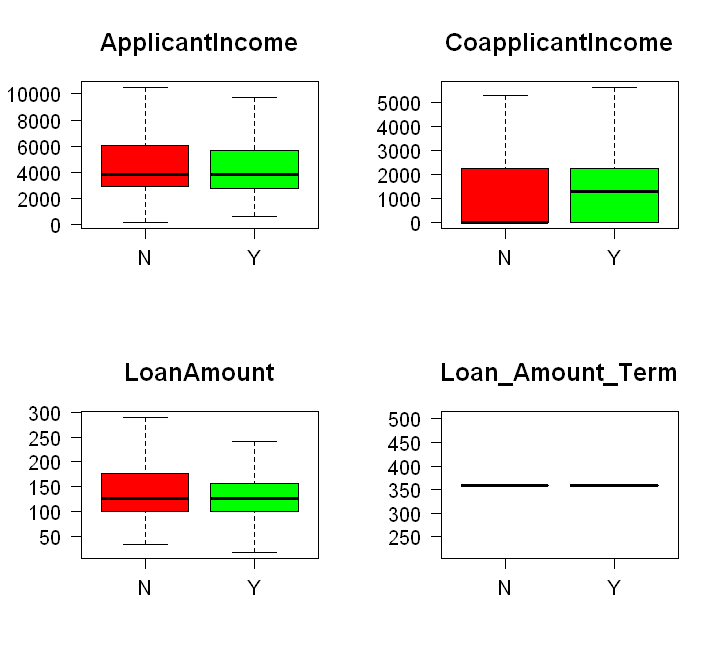

In [39]:
# Observation des variables quantitatives en fonction de la variable qualitative: (les outliers ne sont pas montrés)
options(repr.plot.width = 6, repr.plot.height = 5.5)
par(mfrow = c(2, 2))
for (i in seq(7, 10))
{
    boxplot(train[, i] ~ train$Loan_Status, xlab = "", ylab = "", main = names(train)[i], col = c('red', 'green'), 
            horizontal = F, las = 1, cex.axis = 1.2, cex.main = 1.5, outline = F)
}

CCL: On devine très vite que ces variables risquent de ne pas impacter dans la détermination de la notation du crédit.

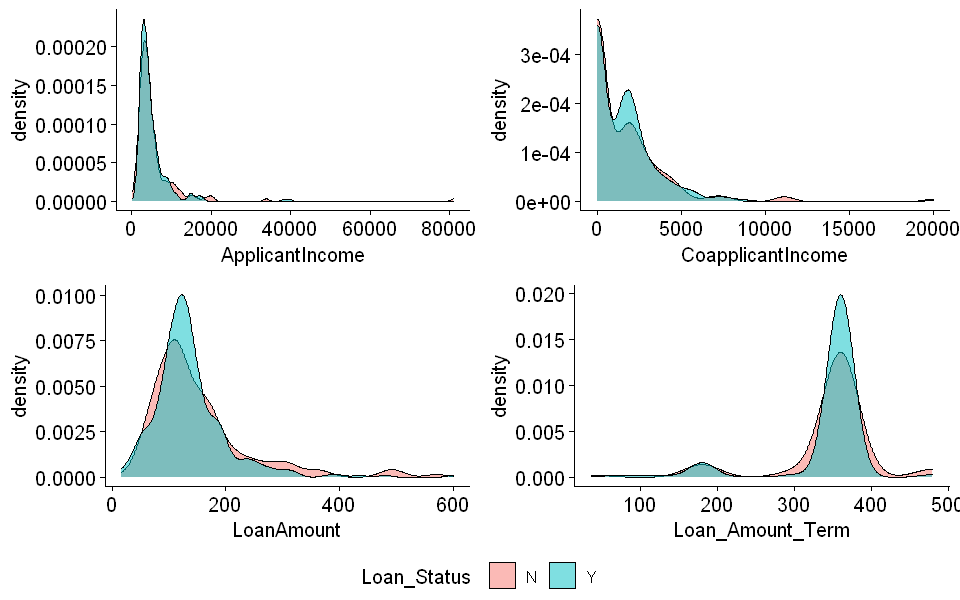

In [40]:
# Observation des variables quantitatives en fonction de la variable qualitative:
options(repr.plot.width = 8, repr.plot.height = 5)
g1 <- ggdensity(train, x = 'ApplicantIncome', fill = 'Loan_Status')
g2 <- ggdensity(train, x = 'CoapplicantIncome', fill = 'Loan_Status')
g3 <- ggdensity(train, x = 'LoanAmount', fill = 'Loan_Status')
g4 <- ggdensity(train, x = 'Loan_Amount_Term', fill = 'Loan_Status')
ggarrange(g1, g2, g3, g4, common.legend = TRUE, legend = "bottom")

CCL: Ces variables ne sont en rien déterminantes dans l'accord des prêts.

On effectue une ANOVA sur les variables quantitatives en fonction de la variable catégorielle 'Loan_Status'.<br/>
Il faut, avant cela, s'assurer de la normalité de nos variables à expliquer.<br/>
Pour cela, on observe dans un premier un graphe quantile-quantile puis on procède ensuite à un test de Shapiro-Wilk.

### <span style='color:purple'>Test de normalité des variables:

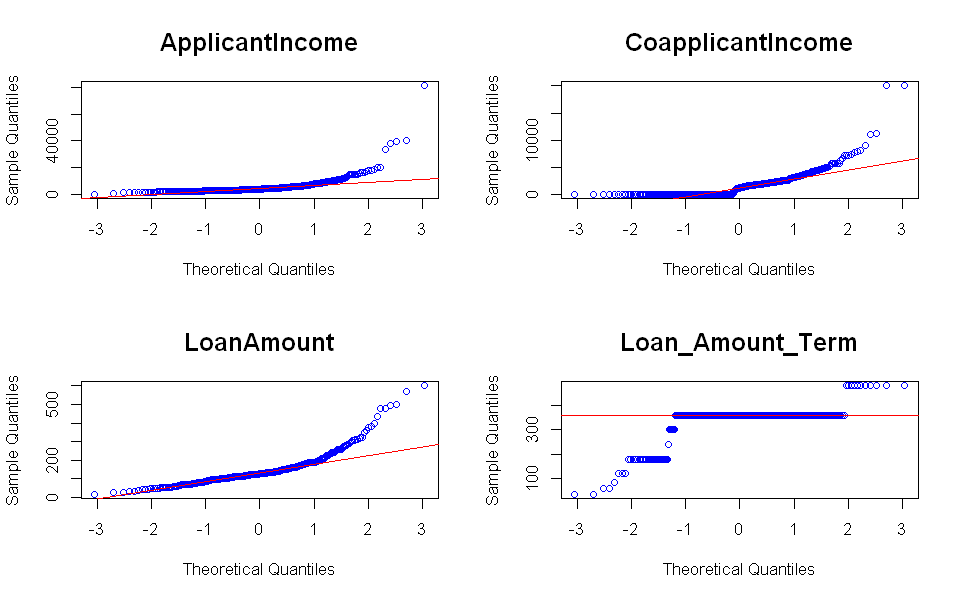

In [41]:
# Graphes QQ-plot de chaque variable:
options(repr.plot.width = 8, repr.plot.height = 5)
par(mfrow = c(2, 2))

for (i in seq(7, 10))
{
    qqnorm(train[, c(i)], cex = 1, col = "blue", main = names(train)[i], cex.main = 1.5)
    qqline(train[, c(i)], col = 'red')
}

CCL: Les variables semblent suivre une loi normale.

#### <span style='color:red'>Test de Shapiro-Wilk.<a name="M"></a>

Hypothèse nulle H0: la variable suit une loi normale.<br/>
Hypothèse alternative H1: la variable n'est pas gaussienne.<br/>
Test bilatéral car H0 est différent de H1.

Seuil de risque à 1%.

In [107]:
alpha <- 0.01
for (i in seq(7, 10))
{
    if (shapiro.test(train[, i])$p.value < alpha)
        cat(sprintf('%s: H0 est rejetée (p-value = %s).\n\n', names(train)[i],
                    round(shapiro.test(train[, c(i)])$p.value, digits = 40)))
}

ApplicantIncome: H0 est rejetée (p-value = 1.6084835e-33).

CoapplicantIncome: H0 est rejetée (p-value = 5.620023566467e-28).

LoanAmount: H0 est rejetée (p-value = 3.58308267930214e-22).

Loan_Amount_Term: H0 est rejetée (p-value = 9.543222e-34).



CCL: La p_value étant significative au seuil de 1%, H0 est rejeté: aucune variable ne suit une loi normale.<br/>
Or, au regard de la taille de notre échantillon, le TCL permet de considérer que nos variables sont gaussiennes.

On peut donc maintenant appliquer sur nos variables la statistique de test de Fisher (ANOVA).

### <span style='color:purple'>ANOVA:

Vérifions l'intérêt des variables pour savoir si elles sont déterminantes dans l'autorisation d'un prêt.<br/>
Pour cela, on compare les moyennes de chaque variable en fonction de l'accord du prêt.<br/>

Hypothèse nulle H0: les moyennes de chaque modalité propre à la variable sont égales.<br/>
Hypthèse alternative H1: les moyennes de chaque modalité propre à la variable sont différentes.<br/>
Test bilatéral et seuil de risque alpha est fixé à 5%.

In [105]:
alpha <- 0.05
for (i in seq(7, 10))
{
    if (summary(aov(train[, i] ~ train$Loan_Status, train))[[1]][["Pr(>F)"]][[1]] < alpha)
        cat(sprintf('%s: H0 est rejetée (p-value = %s).\n\n', names(train)[i], 
                    round(summary(aov(train[, i] ~ train$Loan_Status, train))[[1]][["Pr(>F)"]][[1]], digits = 4)))
}
        

LoanAmount: H0 est rejetée (p-value = 0.0422).



CCL: Mise à part LoanAmount, on peut affirmer que les trois autres variables ne sont pas déterminantes pour l'autorisation du prêt (bien que LoanAmount ait une p-value proche du seuil de risque).

### <span style='color:purple'>Test du Chi² d'indépendance:

In [44]:
# Création d'un nouveau dataframe sans les variables quantitatives:
train2 <- train[, -c(1, 7:10)]
head(train2)

Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
Male,Yes,1,Graduate,No,1,Rural,N
Male,Yes,0,Graduate,Yes,1,Urban,Y
Male,Yes,0,Not Graduate,No,1,Urban,Y
Male,No,0,Graduate,No,1,Urban,Y
Male,Yes,2,Graduate,Yes,1,Urban,Y
Male,Yes,0,Not Graduate,No,1,Urban,Y


### <span style='color:red'>Test du Chi²:

Hypothèse nulle H0: Les variables sont indépendantes entre elles.<br/>
Hypothèse alternative H1: Les variables sont liées.<br/>
Test bilatéral et seuil de risque fixé à 5%.

In [45]:
alpha <- 0.05
for (i in seq(1, 7))
{
    if (chisq.test(table(train2$Loan_Status, train2[, i]))$p.val < alpha)
        cat(sprintf('%s: H0 est rejetée (p-value = %s): Les variables sont liées.\n\n', names(train2)[i], 
                    round(chisq.test(table(train2$Loan_Status, train2[, i]))$p.val, digits = 40)))        
}

Married: H0 est rejetée (p-value = 0.0144132881918812): Les variables sont liées.

Credit_History: H0 est rejetée (p-value = 9.44668785929582e-26): Les variables sont liées.

Property_Area: H0 est rejetée (p-value = 0.00160991328300756): Les variables sont liées.



CCL: Ces trois variables semblent prépondérantes à la notation du crédit, bien que les p-values de Married et Property_Area soient très proches du seuil de risque.

<a href="#sommaire">Retour au sommaire</a>
## <span style='color:brown'>c) Corrélations entre variables.<a name="M123"></a> 
### <span style='color:red'>i) Sur l'ensemble des prêts:<a name="M1231"></a>

In [46]:
loan <- train[, -1] # copie

# Conversion des colonnes 'factor' en variables numériques:
loan$Gender <- as.numeric(loan$Gender)
loan$Married <- as.numeric(loan$Married)
loan$Dependents <- as.numeric(loan$Dependents)
loan$Education <- as.numeric(loan$Education)
loan$Self_Employed <- as.numeric(loan$Self_Employed)
loan$Credit_History <- as.numeric(loan$Credit_History)
loan$Property_Area <- as.numeric(loan$Property_Area)
loan$Loan_Status <- as.numeric(loan$Loan_Status)

loan

Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,2,2,1,1,4583,1508,128,360,2,1,1
2,2,1,1,2,3000,0,66,360,2,3,2
2,2,1,2,1,2583,2358,120,360,2,3,2
2,1,1,1,1,6000,0,141,360,2,3,2
2,2,3,1,2,5417,4196,267,360,2,3,2
2,2,1,2,1,2333,1516,95,360,2,3,2
2,2,4,1,1,3036,2504,158,360,1,2,1
2,2,3,1,1,4006,1526,168,360,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...
1,1,1,1,1,2138,0,99,360,1,2,1


In [47]:
round(cor(loan[, -1]), 2)
round(cor_pmat(loan[, -1]), 9)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Married,1.00,0.37,0.02,0.02,0.02,0.18,0.16,-0.10,0.04,0.05,0.12
Dependents,0.37,1.00,0.03,0.04,0.13,0.05,0.17,-0.10,-0.03,0.00,0.06
Education,0.02,0.03,1.00,-0.01,-0.13,-0.08,-0.18,-0.15,-0.07,-0.04,-0.07
Self_Employed,0.02,0.04,-0.01,1.00,0.15,0.04,0.08,-0.05,-0.02,-0.05,-0.02
ApplicantIncome,0.02,0.13,-0.13,0.15,1.00,-0.10,0.48,-0.03,-0.07,-0.07,-0.06
CoapplicantIncome,0.18,0.05,-0.08,0.04,-0.10,1.00,0.30,0.00,-0.01,-0.01,-0.01
LoanAmount,0.16,0.17,-0.18,0.08,0.48,0.30,1.00,0.04,-0.05,-0.14,-0.10
Loan_Amount_Term,-0.10,-0.10,-0.15,-0.05,-0.03,0.00,0.04,1.00,0.04,-0.09,-0.01
Credit_History,0.04,-0.03,-0.07,-0.02,-0.07,-0.01,-0.05,0.04,1.00,-0.01,0.51
Property_Area,0.05,0.00,-0.04,-0.05,-0.07,-0.01,-0.14,-0.09,-0.01,1.00,0.03


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Married,0.000000000,0.000000000,0.638730552,0.75177461,0.643079655,0.000199239,0.000717783,0.044224852,0.3831280,0.344673517,0.01055269
Dependents,0.000000000,0.000000000,0.486680508,0.39710273,0.009235621,0.266012339,0.000425838,0.032876730,0.5628921,0.961747597,0.24943620
Education,0.638730552,0.486680508,0.000000000,0.78009002,0.006120838,0.119531552,0.000118338,0.002423274,0.1586358,0.367689141,0.15950204
Self_Employed,0.751774607,0.397102733,0.780090022,0.00000000,0.001913870,0.373416001,0.083541182,0.300237530,0.7524252,0.340410561,0.67428533
ApplicantIncome,0.643079655,0.009235621,0.006120838,0.00191387,0.000000000,0.031386462,0.000000000,0.596494496,0.1243677,0.150254467,0.21093023
CoapplicantIncome,0.000199239,0.266012339,0.119531552,0.37341600,0.031386462,0.000000000,0.000000000,0.981688271,0.7600144,0.769769623,0.89080497
LoanAmount,0.000717783,0.000425838,0.000118338,0.08354118,0.000000000,0.000000000,0.000000000,0.457112792,0.2554426,0.003725242,0.04222219
Loan_Amount_Term,0.044224852,0.032876730,0.002423274,0.30023753,0.596494496,0.981688271,0.457112792,0.000000000,0.4140725,0.050222394,0.76508491
Credit_History,0.383127968,0.562892103,0.158635802,0.75242517,0.124367672,0.760014388,0.255442647,0.414072455,0.0000000,0.900999168,0.00000000
Property_Area,0.344673517,0.961747597,0.367689141,0.34041056,0.150254467,0.769769623,0.003725242,0.050222394,0.9009992,0.000000000,0.51950197


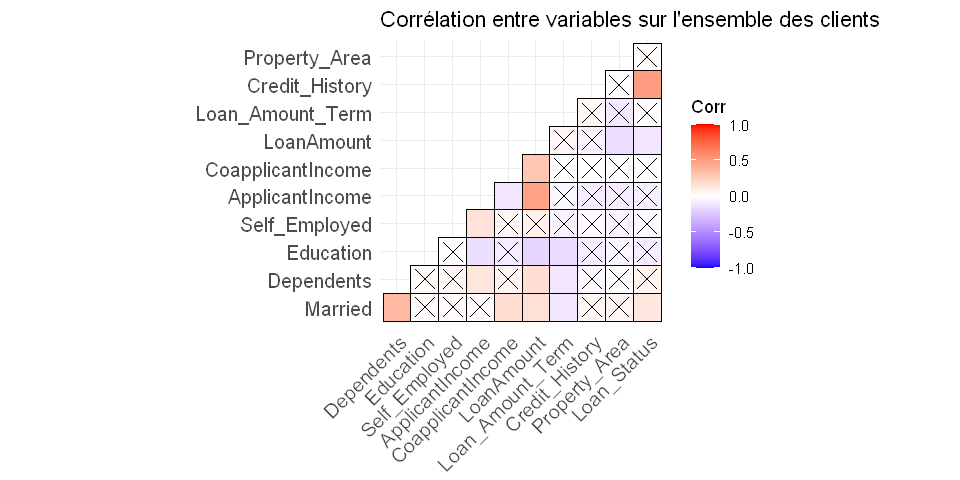

In [48]:
options(repr.plot.width = 8, repr.plot.height = 4)
ggcorrplot(cor(loan[, -1]), outline.col = "black", type = 'lower', p.mat = cor_pmat(loan[, c(-1)]),
           title = 'Corrélation entre variables sur l\'ensemble des clients')

CCL:<br/>
Il y a donc une forte corrélation entre les antécédents de crédit et l'accord du prêt, ainsi qu'avec le statut marital et le montant demandé. On ne retrouve pas de corrélation entre Property_Area et Loan_Status.

Pour "info", il y a forte corrélation entre le montant demandé et les revenus des demandeurs et codemandeurs.<br/> 
De même, le fait d'être marié, d'avoir des personnes à charges ou d'être diplomé a une corrélation sur la durée demandée et sur le montant demandé.

<a href="#sommaire">Retour au sommaire</a>
### <span style='color:red'>ii) En fonction de la notation crédit:<a name="M1232"></a>

In [49]:
oui <- loan[loan$Loan_Status == 2, 2:11]
non <- loan[loan$Loan_Status == 1, 2:11]
head(oui)
head(non)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
2,2,1,1,2,3000,0,66,360,2,3
3,2,1,2,1,2583,2358,120,360,2,3
4,1,1,1,1,6000,0,141,360,2,3
5,2,3,1,2,5417,4196,267,360,2,3
6,2,1,2,1,2333,1516,95,360,2,3
8,2,3,1,1,4006,1526,168,360,2,3


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,2,2,1,1,4583,1508,128,360,2,1
7,2,4,1,1,3036,2504,158,360,1,2
9,2,2,1,1,12841,10968,349,360,2,2
12,1,1,1,1,1853,2840,114,360,2,1
15,1,1,1,1,3510,0,76,360,1,3
16,2,1,2,1,4887,0,133,360,2,1


### <span style='color:purple'>Prêts accordés:

In [50]:
round(cor(oui), 3)
round(cor_pmat(oui), 9)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Married,1.000,0.372,-0.010,0.033,0.006,0.123,0.176,-0.105,0.033,0.074
Dependents,0.372,1.000,0.056,0.078,0.137,-0.026,0.195,-0.078,-0.075,-0.003
Education,-0.010,0.056,1.000,-0.004,-0.114,-0.053,-0.157,-0.106,0.018,-0.013
Self_Employed,0.033,0.078,-0.004,1.000,0.249,-0.003,0.132,-0.018,0.060,-0.102
ApplicantIncome,0.006,0.137,-0.114,0.249,1.000,-0.144,0.445,-0.099,-0.136,-0.022
CoapplicantIncome,0.123,-0.026,-0.053,-0.003,-0.144,1.000,0.221,0.038,-0.042,-0.075
LoanAmount,0.176,0.195,-0.157,0.132,0.445,0.221,1.000,-0.005,-0.155,-0.132
Loan_Amount_Term,-0.105,-0.078,-0.106,-0.018,-0.099,0.038,-0.005,1.000,0.086,-0.130
Credit_History,0.033,-0.075,0.018,0.060,-0.136,-0.042,-0.155,0.086,1.000,0.038
Property_Area,0.074,-0.003,-0.013,-0.102,-0.022,-0.075,-0.132,-0.130,0.038,1.000


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Married,0.000000000,0.000000000,0.869761279,0.571234552,0.920927517,0.034360484,0.002273262,0.07052079,0.575974793,0.20167251
Dependents,0.000000000,0.000000000,0.336906037,0.182099151,0.018574890,0.655809973,0.000723778,0.17905191,0.199912343,0.95718383
Education,0.869761279,0.336906037,0.000000000,0.941836348,0.050546999,0.362419544,0.006797784,0.06863633,0.755423953,0.82916074
Self_Employed,0.571234552,0.182099151,0.941836348,0.000000000,0.000014532,0.962074785,0.022621874,0.76018259,0.306703836,0.08062709
ApplicantIncome,0.920927517,0.018574890,0.050546999,0.000014532,0.000000000,0.012870780,0.000000000,0.08920125,0.019176332,0.70257149
CoapplicantIncome,0.034360484,0.655809973,0.362419544,0.962074785,0.012870780,0.000000000,0.000118698,0.51030656,0.469967508,0.19951342
LoanAmount,0.002273262,0.000723778,0.006797784,0.022621874,0.000000000,0.000118698,0.000000000,0.93315563,0.007576488,0.02267370
Loan_Amount_Term,0.070520787,0.179051906,0.068636326,0.760182595,0.089201252,0.510306561,0.933155632,0.00000000,0.139226635,0.02546012
Credit_History,0.575974793,0.199912343,0.755423953,0.306703836,0.019176332,0.469967508,0.007576488,0.13922663,0.000000000,0.51407669
Property_Area,0.201672507,0.957183827,0.829160744,0.080627091,0.702571494,0.199513423,0.022673704,0.02546012,0.514076695,0.00000000


### <span style='color:purple'>Prêts refusés:

In [51]:
round(cor(non), 3)
round(cor_pmat(non), 9)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Married,1.000,0.370,0.110,-0.012,0.062,0.278,0.181,-0.080,-0.068,-0.016
Dependents,0.370,1.000,-0.001,-0.038,0.133,0.204,0.149,-0.153,-0.082,-0.006
Education,0.110,-0.001,1.000,-0.036,-0.171,-0.112,-0.249,-0.220,-0.083,-0.092
Self_Employed,-0.012,-0.038,-0.036,1.000,0.034,0.119,0.004,-0.111,-0.050,0.058
ApplicantIncome,0.062,0.133,-0.171,0.034,1.000,-0.066,0.510,0.054,-0.019,-0.122
CoapplicantIncome,0.278,0.204,-0.112,0.119,-0.066,1.000,0.405,-0.055,0.000,0.077
LoanAmount,0.181,0.149,-0.249,0.004,0.510,0.405,1.000,0.092,0.070,-0.146
Loan_Amount_Term,-0.080,-0.153,-0.220,-0.111,0.054,-0.055,0.092,1.000,0.047,-0.034
Credit_History,-0.068,-0.082,-0.083,-0.050,-0.019,0.000,0.070,0.047,1.000,-0.069
Property_Area,-0.016,-0.006,-0.092,0.058,-0.122,0.077,-0.146,-0.034,-0.069,1.000


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Married,0.000000000,0.000011627,0.209456661,0.8880679,0.4783839,0.001213597,0.037583496,0.36216055,0.4354434,0.85232447
Dependents,0.000011627,0.000000000,0.986488237,0.6647026,0.1280290,0.018662200,0.086412915,0.07813036,0.3499865,0.94507796
Education,0.209456661,0.986488237,0.000000000,0.6847045,0.0489186,0.198466142,0.003908298,0.01087018,0.3411163,0.29069257
Self_Employed,0.888067919,0.664702563,0.684704495,0.0000000,0.7001821,0.171505403,0.960020073,0.20349885,0.5686883,0.50859277
ApplicantIncome,0.478383903,0.128029037,0.048918598,0.7001821,0.0000000,0.448368381,0.000000000,0.53565329,0.8268175,0.16226207
CoapplicantIncome,0.001213597,0.018662200,0.198466142,0.1715054,0.4483684,0.000000000,0.000001319,0.52603785,0.9984055,0.37612752
LoanAmount,0.037583496,0.086412915,0.003908298,0.9600201,0.0000000,0.000001319,0.000000000,0.29313352,0.4256116,0.09468336
Loan_Amount_Term,0.362160546,0.078130358,0.010870179,0.2034989,0.5356533,0.526037853,0.293133521,0.00000000,0.5895007,0.69509764
Credit_History,0.435443383,0.349986517,0.341116294,0.5686883,0.8268175,0.998405547,0.425611578,0.58950068,0.0000000,0.43144850
Property_Area,0.852324469,0.945077961,0.290692566,0.5085928,0.1622621,0.376127517,0.094683363,0.69509764,0.4314485,0.00000000


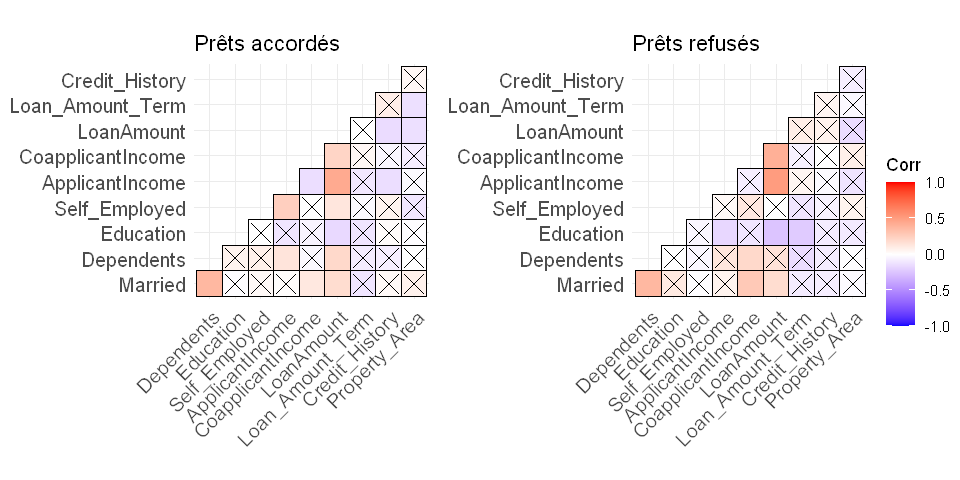

In [52]:
g_oui <- ggcorrplot(cor(oui), outline.col = "black", type = 'lower', p.mat = cor_pmat(oui), title = 'Prêts accordés')
g_non <- ggcorrplot(cor(non), outline.col = "black", type = 'lower', p.mat = cor_pmat(non), title = 'Prêts refusés')
ggarrange(g_oui, g_non, common.legend = TRUE, legend = 'right')

CCL:
- Les prêts semblent être accordés en priorité à des travailleurs indépendants, diplomés, ayant des personnes à charges, la durée de remboursement étant corrélée à la zone d'habitation et au statut marital de l'emprunteur.

<a href="#sommaire">Retour au sommaire</a>
# Mission 2 - Analyse exploratoire des données.<a name="M2"></a>
## <span style='color:blue'>1. Détermination du nombre de composantes principales.<a name="M21"></a>
## <span style='color:brown'>a) Etude de l'inertie:<a name="M211"></a>

In [53]:
pret <- train[, -1]
dim(pret)
head(pret)

[1] 430  12

Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y


In [54]:
# Nombre de niveaux par variables classés 'factor':
sapply(pret, nlevels)

Gender           Married        Dependents         Education 
                2                 2                 4                 2 
    Self_Employed   ApplicantIncome CoapplicantIncome        LoanAmount 
                2                 0                 0                 0 
 Loan_Amount_Term    Credit_History     Property_Area       Loan_Status 
                0                 2                 3                 2

In [55]:
# On place Loan_Status en variable qualitative supplémentaire:
mca <- MCA(pret, ncp = 8, quanti.sup = 6:9, quali.sup = 12)

In [56]:
eig.val <- get_eigenvalue(mca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,0.23749258,16.624481,16.62448
Dim.2,0.17251911,12.076338,28.70082
Dim.3,0.16184262,11.328983,40.02980
Dim.4,0.15021341,10.514938,50.54474
Dim.5,0.14596389,10.217472,60.76221
Dim.6,0.13362347,9.353643,70.11586
Dim.7,0.12785265,8.949685,79.06554
Dim.8,0.11145932,7.802153,86.86769
Dim.9,0.11045032,7.731522,94.59922
Dim.10,0.07715406,5.400784,100.00000


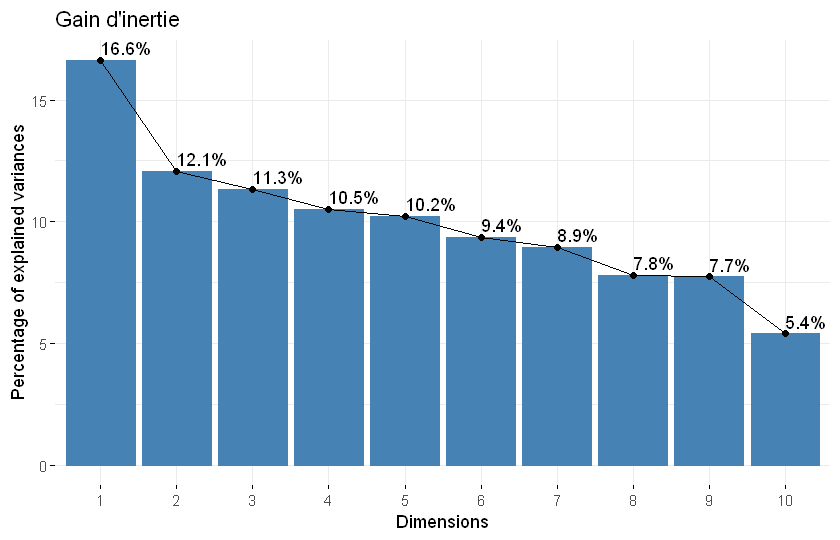

In [57]:
options(repr.plot.width = 7, repr.plot.height = 4.5)
fviz_eig(mca, addlabels = TRUE, main = 'Gain d\'inertie')

<a href="#sommaire">Retour au sommaire</a>
## <span style='color:blue'>2. Analyse des Correspondances Multiples.<a name="M22"></a>

In [108]:
mca <- MCA(pret, ncp = 5, quanti.sup = 6:9, quali.sup = 12)

In [109]:
var <- get_mca_var(mca)
var

Multiple Correspondence Analysis Results for variables
  Name       Description                  
1 "$coord"   "Coordinates for categories" 
2 "$cos2"    "Cos2 for categories"        
3 "$contrib" "contributions of categories"

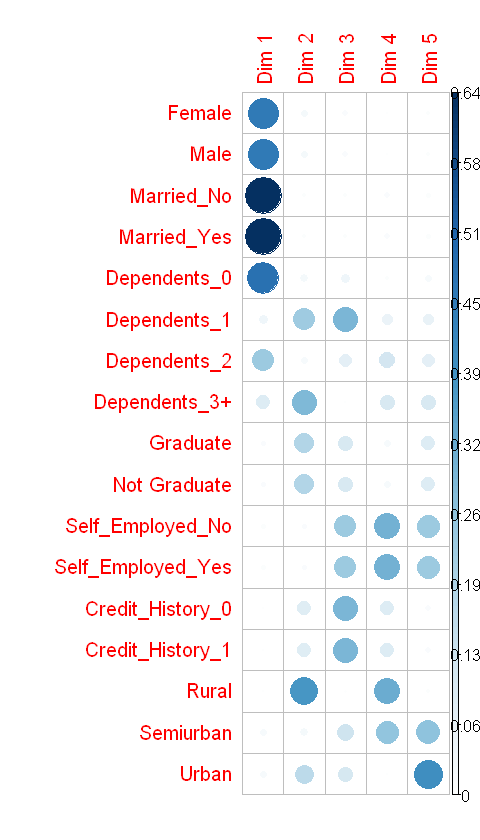

In [121]:
options(repr.plot.width = 4, repr.plot.height = 7)
corrplot(var$cos2, is.corr = F)

In [61]:
# summmary des variables:
#mca$var

<a href="#sommaire">Retour au sommaire</a>
## <span style='color:brown'>a) Plan factoriel de dimension 1 et 3.<a name="M221"></a>

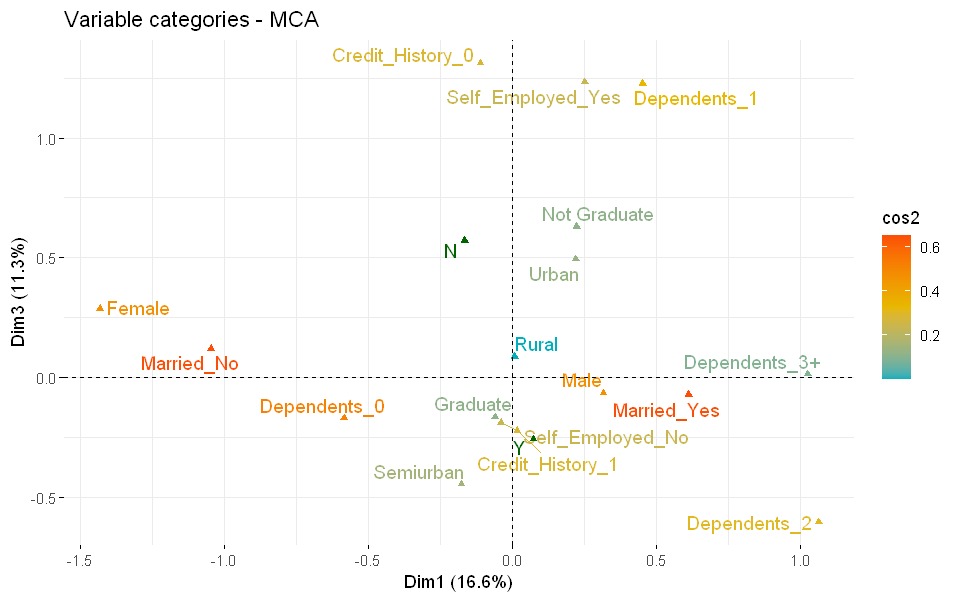

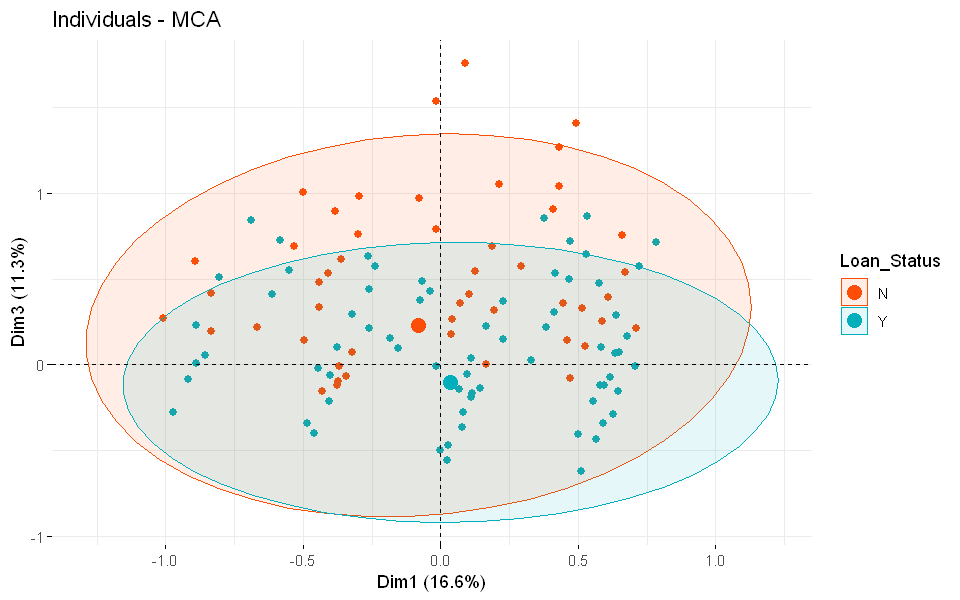

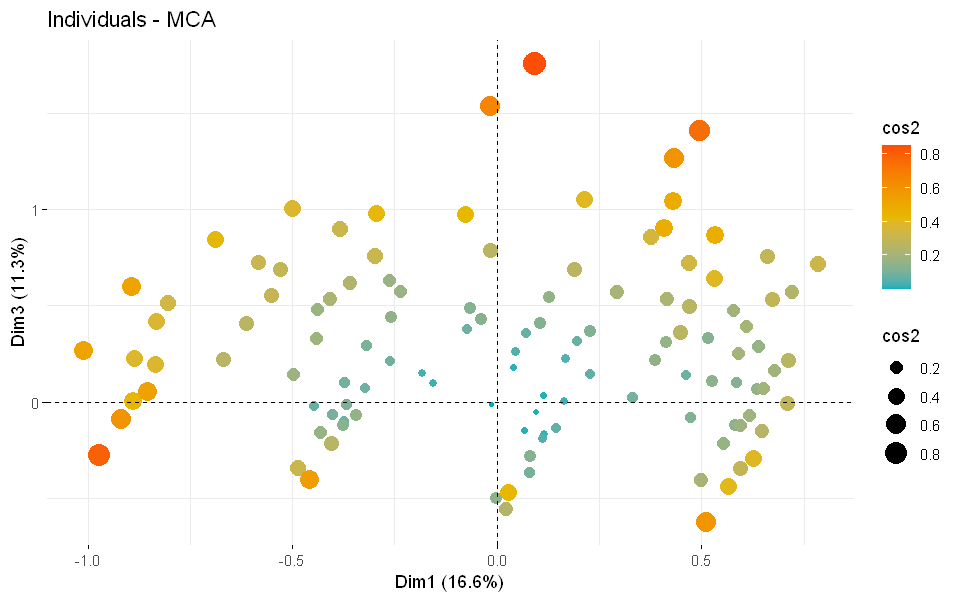

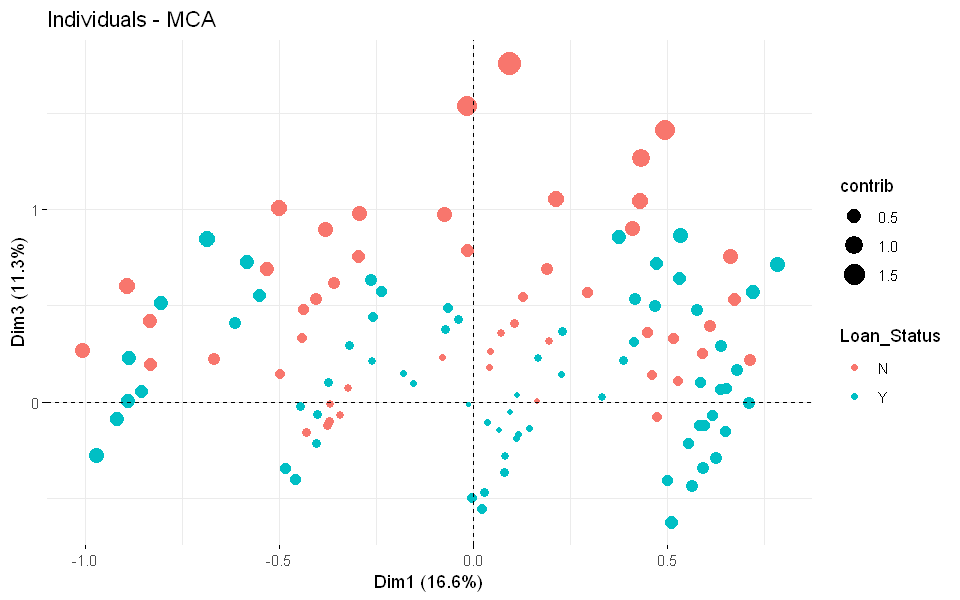

In [122]:
# Graphes des modalités et des individus:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_mca_var(mca, axes = c(1, 3), col.var = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)

fviz_mca_ind (mca, axes = c(1, 3), geom = c('point'), habillage = 12, pointsize = 2, labelsize = 3, 
              palette = c("#FC4E07", "#00AFBB"), addEllipses = TRUE, ellipse.level = 0.95)

fviz_mca_ind (mca, axes = c(1, 3), geom = c("point"), labelsize = 3, col.ind = "cos2", pointsize = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"))

fviz_mca_ind (mca, axes = c(1, 3), geom = ("point"), habillage = 12, pointsize = "contrib")

<a href="#sommaire">Retour au sommaire</a>
## <span style='color:brown'>b) Plan factoriel de dimension 3 et 4.<a name="M222"></a>

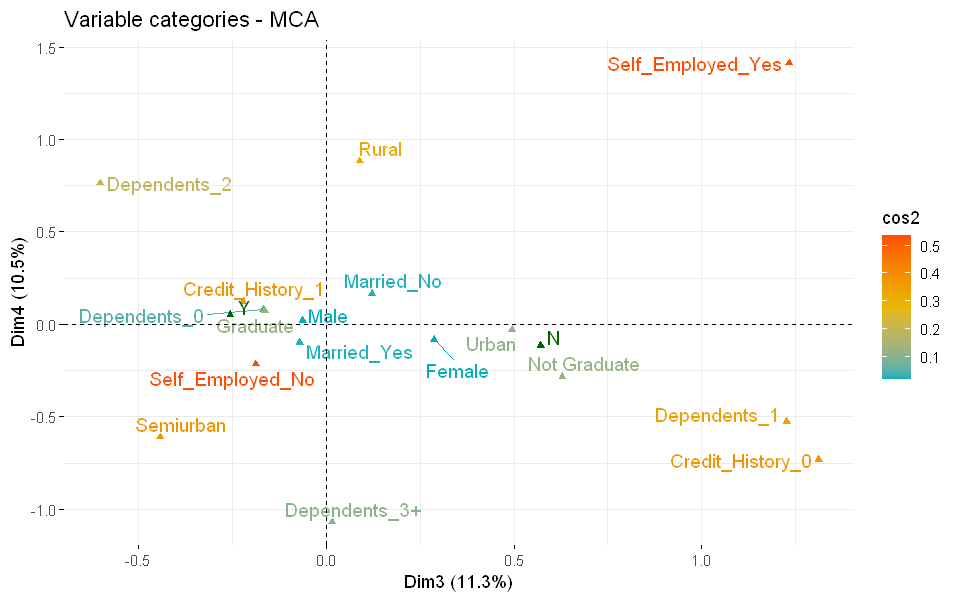

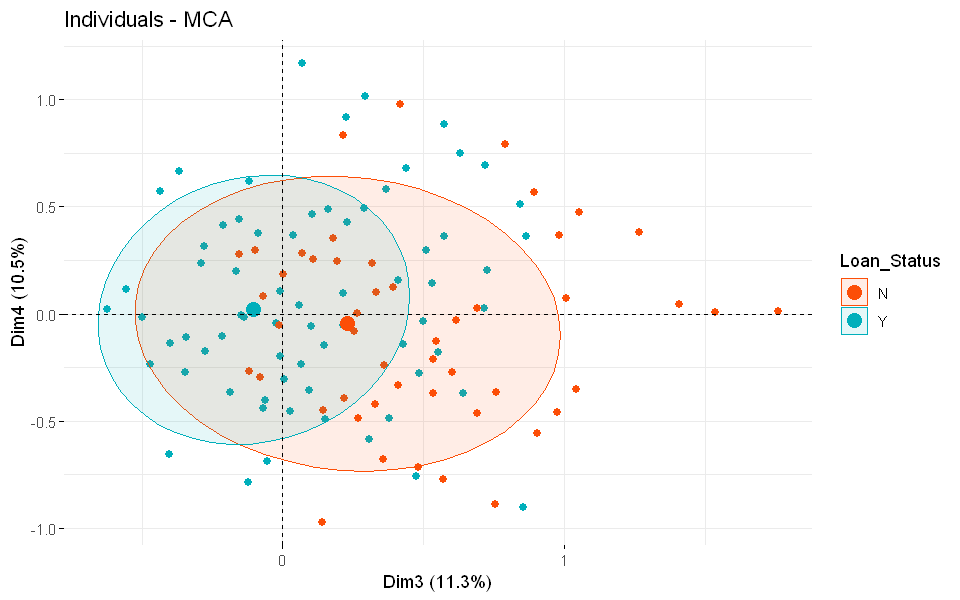

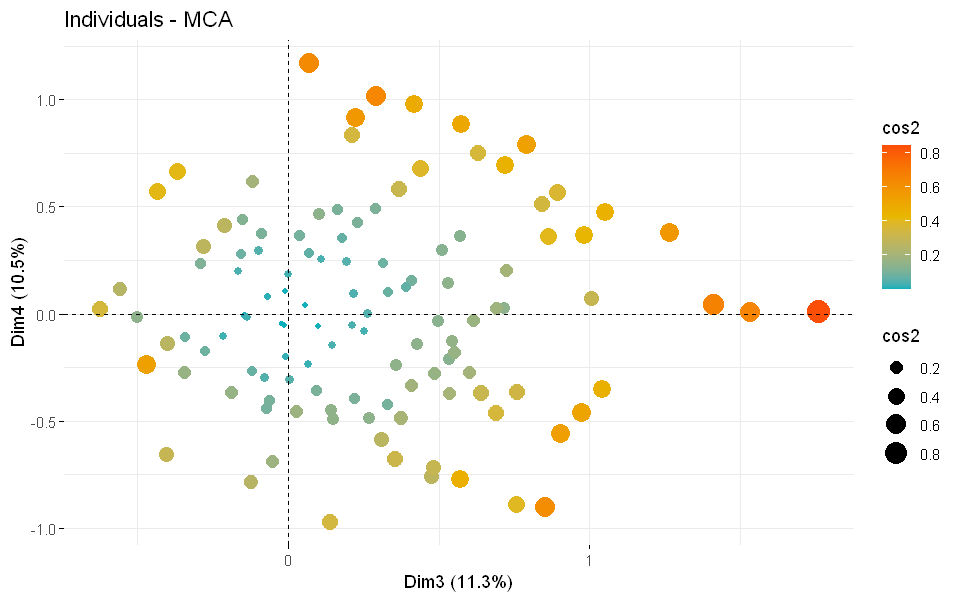

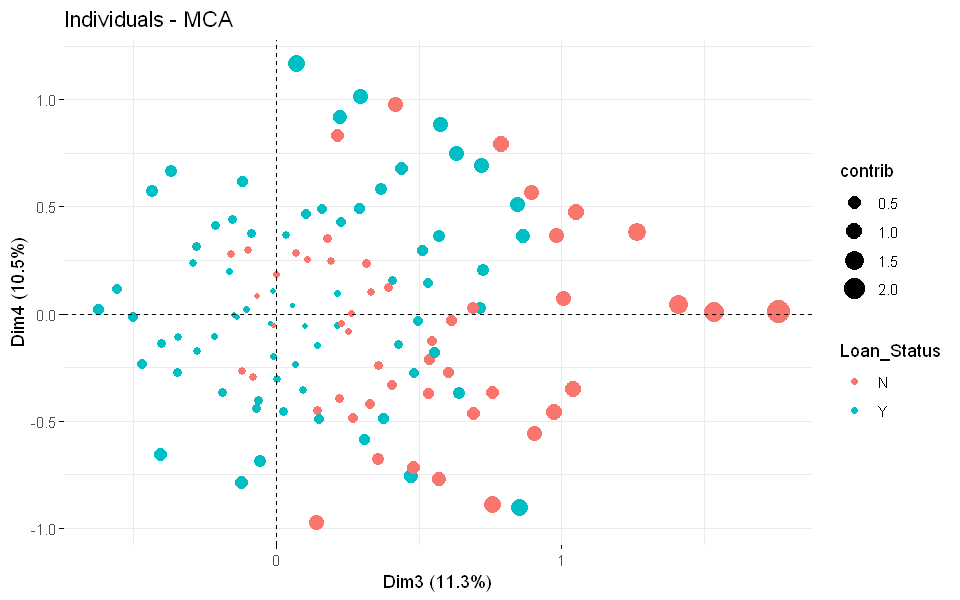

In [123]:
# Graphes des modalités et des individus:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_mca_var(mca, axes = c(3, 4), col.var = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)

fviz_mca_ind (mca, axes = c(3, 4), geom = c('point'), habillage = 12, pointsize = 2, labelsize = 3, 
              palette = c("#FC4E07", "#00AFBB"), addEllipses = TRUE, ellipse.level = 0.75)

fviz_mca_ind (mca, axes = c(3, 4), geom = c("point"), labelsize = 3, col.ind = "cos2", pointsize = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"))

fviz_mca_ind (mca, axes = c(3, 4), geom = ("point"), habillage = 12, pointsize = "contrib")

<a href="#sommaire">Retour au sommaire</a>
# Mission 3 - Analyse prédictive.<a name="M3"></a>
## <span style='color:blue'>1. Modélisation à l'aide d'une régression logistique multiple à variable binaire.<a name="M31"></a>
### <span style='color:brown'>a) Modélisation.<a name="M311"></a>

In [65]:
# Paramétrage du processus d'apprentissage par validation croisée stratifiée:
train.control <- trainControl(method = "cv", number = 5)

In [66]:
# Méthode de sélection pas à pas "Both", basée sur le critère d'Akaike:
model <- train(Loan_Status ~ ., data = pret, method = 'glmStepAIC', family = 'binomial', trControl = train.control)
model

Start:  AIC=345.94
.outcome ~ GenderMale + MarriedYes + Dependents1 + Dependents2 + 
    `Dependents3+` + `EducationNot Graduate` + Self_EmployedYes + 
    ApplicantIncome + CoapplicantIncome + LoanAmount + Loan_Amount_Term + 
    Credit_History1 + Property_AreaSemiurban + Property_AreaUrban

                          Df Deviance    AIC
- CoapplicantIncome        1   315.96 343.96
- ApplicantIncome          1   316.01 344.01
- Self_EmployedYes         1   316.03 344.03
- GenderMale               1   316.05 344.05
- Property_AreaUrban       1   316.13 344.13
- `Dependents3+`           1   316.80 344.80
- Dependents2              1   316.85 344.85
- `EducationNot Graduate`  1   316.98 344.98
- Loan_Amount_Term         1   317.20 345.20
<none>                         315.94 345.94
- Dependents1              1   318.10 346.10
- MarriedYes               1   319.82 347.82
- LoanAmount               1   321.61 349.61
- Property_AreaSemiurban   1   322.18 350.18
- Credit_History1          1   


Step:  AIC=342.79
.outcome ~ GenderMale + MarriedYes + Dependents1 + Dependents2 + 
    `Dependents3+` + `EducationNot Graduate` + ApplicantIncome + 
    CoapplicantIncome + LoanAmount + Loan_Amount_Term + Credit_History1 + 
    Property_AreaSemiurban + Property_AreaUrban

                          Df Deviance    AIC
- Loan_Amount_Term         1   314.89 340.89
- CoapplicantIncome        1   314.95 340.95
- ApplicantIncome          1   314.99 340.99
- Property_AreaUrban       1   315.14 341.14
- `Dependents3+`           1   315.14 341.14
- GenderMale               1   315.26 341.26
- Dependents2              1   315.47 341.47
- Dependents1              1   315.66 341.66
- `EducationNot Graduate`  1   315.97 341.97
<none>                         314.79 342.79
- MarriedYes               1   317.71 343.71
- LoanAmount               1   318.78 344.78
- Property_AreaSemiurban   1   327.17 353.17
- Credit_History1          1   395.57 421.57

Step:  AIC=340.89
.outcome ~ GenderMale + Married


Step:  AIC=332.5
.outcome ~ GenderMale + MarriedYes + Dependents1 + Dependents2 + 
    `Dependents3+` + `EducationNot Graduate` + ApplicantIncome + 
    LoanAmount + Loan_Amount_Term + Credit_History1 + Property_AreaSemiurban + 
    Property_AreaUrban

                          Df Deviance    AIC
- ApplicantIncome          1   306.65 330.65
- Property_AreaUrban       1   306.67 330.67
- `Dependents3+`           1   306.80 330.80
- Dependents1              1   306.90 330.90
- GenderMale               1   307.34 331.34
- Loan_Amount_Term         1   307.81 331.81
- Dependents2              1   307.87 331.87
- `EducationNot Graduate`  1   308.45 332.45
<none>                         306.50 332.50
- MarriedYes               1   308.64 332.64
- LoanAmount               1   309.44 333.44
- Property_AreaSemiurban   1   315.46 339.46
- Credit_History1          1   395.71 419.71

Step:  AIC=330.65
.outcome ~ GenderMale + MarriedYes + Dependents1 + Dependents2 + 
    `Dependents3+` + `Education


Step:  AIC=329.98
.outcome ~ MarriedYes + Dependents1 + Dependents2 + `Dependents3+` + 
    `EducationNot Graduate` + Self_EmployedYes + ApplicantIncome + 
    LoanAmount + Credit_History1 + Property_AreaSemiurban + Property_AreaUrban

                          Df Deviance    AIC
- Self_EmployedYes         1   306.33 328.33
- `EducationNot Graduate`  1   306.58 328.58
- LoanAmount               1   306.62 328.62
- ApplicantIncome          1   306.85 328.85
- Dependents1              1   307.01 329.01
- Property_AreaUrban       1   307.13 329.13
<none>                         305.98 329.98
- `Dependents3+`           1   308.22 330.22
- Dependents2              1   308.40 330.40
- MarriedYes               1   309.36 331.36
- Property_AreaSemiurban   1   318.55 340.55
- Credit_History1          1   402.56 424.56

Step:  AIC=328.33
.outcome ~ MarriedYes + Dependents1 + Dependents2 + `Dependents3+` + 
    `EducationNot Graduate` + ApplicantIncome + LoanAmount + 
    Credit_History1 + Prope

                          Df Deviance    AIC
- Self_EmployedYes         1   312.23 332.23
- CoapplicantIncome        1   312.36 332.36
- Dependents1              1   313.37 333.37
- MarriedYes               1   313.43 333.43
- `EducationNot Graduate`  1   313.70 333.70
<none>                         312.15 334.15
- Dependents2              1   315.62 335.62
- GenderMale               1   316.02 336.02
- LoanAmount               1   319.01 339.01
- Property_AreaSemiurban   1   321.59 341.59
- Credit_History1          1   391.14 411.14

Step:  AIC=332.23
.outcome ~ GenderMale + MarriedYes + Dependents1 + Dependents2 + 
    `EducationNot Graduate` + CoapplicantIncome + LoanAmount + 
    Credit_History1 + Property_AreaSemiurban

                          Df Deviance    AIC
- CoapplicantIncome        1   312.45 330.45
- MarriedYes               1   313.52 331.52
- Dependents1              1   313.53 331.53
- `EducationNot Graduate`  1   313.77 331.77
<none>                         312.23 33


Step:  AIC=411.76
.outcome ~ GenderMale + MarriedYes + Dependents1 + Dependents2 + 
    `EducationNot Graduate` + LoanAmount + Credit_History1 + 
    Property_AreaSemiurban

                          Df Deviance    AIC
- GenderMale               1   394.82 410.82
- `EducationNot Graduate`  1   395.05 411.05
- Dependents1              1   395.19 411.19
- Dependents2              1   395.34 411.34
<none>                         393.76 411.76
- MarriedYes               1   397.68 413.68
- LoanAmount               1   399.14 415.14
- Property_AreaSemiurban   1   407.83 423.83
- Credit_History1          1   497.26 513.26

Step:  AIC=410.82
.outcome ~ MarriedYes + Dependents1 + Dependents2 + `EducationNot Graduate` + 
    LoanAmount + Credit_History1 + Property_AreaSemiurban

                          Df Deviance    AIC
- `EducationNot Graduate`  1   396.00 410.00
- Dependents1              1   396.45 410.45
- Dependents2              1   396.45 410.45
<none>                         394.82 

Generalized Linear Model with Stepwise Feature Selection 

430 samples
 11 predictor
  2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 344, 344, 344, 345, 343 
Resampling results:

  Accuracy   Kappa    
  0.8068852  0.4740128


In [67]:
summary(model)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2083  -0.4474   0.5097   0.7286   2.4252  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -2.468433   0.503346  -4.904 9.39e-07 ***
MarriedYes              0.582117   0.264774   2.199 0.027910 *  
Dependents2             0.629452   0.388831   1.619 0.105484    
LoanAmount             -0.003216   0.001569  -2.050 0.040363 *  
Credit_History1         3.467107   0.435073   7.969 1.60e-15 ***
Property_AreaSemiurban  0.991265   0.277481   3.572 0.000354 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 531.95  on 429  degrees of freedom
Residual deviance: 397.65  on 424  degrees of freedom
AIC: 409.65

Number of Fisher Scoring iterations: 4


CCL: Il est intéressant de constater que la méthode de recherche des variables explicatives retient au final la variable Dependents, dont la p-value est supérieur à 10%.

<a href="#sommaire">Retour au sommaire</a>
### <span style='color:brown'>b) Calcul des odd-ratios:<a name="M312"></a>

In [68]:
exp(cbind(OR = coef(model$finalModel), confint(model$finalModel)))

Waiting for profiling to be done...


,OR,2.5 %,97.5 %
(Intercept),0.08471755,0.02936422,0.2149184
MarriedYes,1.78982395,1.06647418,3.0187082
Dependents2,1.87658148,0.90099075,4.1758964
LoanAmount,0.99678872,0.99368300,0.9998560
Credit_History1,32.04389666,14.53450203,81.7763380
Property_AreaSemiurban,2.69464214,1.58532598,4.7249192


<a href="#sommaire">Retour au sommaire</a>
### <span style='color:brown'>c) Évaluation statistique de la régression.<a name="M313"></a>

In [69]:
# Modèle sous-jacent issu de l'échantillon train ( + coefficients de la régression logistique):
model$finalModel


Call:  NULL

Coefficients:
           (Intercept)              MarriedYes             Dependents2  
             -2.468433                0.582117                0.629452  
            LoanAmount         Credit_History1  Property_AreaSemiurban  
             -0.003216                3.467107                0.991265  

Degrees of Freedom: 429 Total (i.e. Null);  424 Residual
Null Deviance:	    531.9 
Residual Deviance: 397.6 	AIC: 409.6

In [70]:
deviance(model$finalModel) # Une déviance résiduelle faible est révélatrice d'une bonne adéquation du modèle.

[1] 397.6499

In [71]:
(chi2 <- with(model$finalModel, null.deviance - deviance))
(ddl <- with(model$finalModel, df.null - df.residual))

[1] 134.2956

[1] 5

La statistique du rapport de vraisemblance suit une loi du chi2 à 5 degrés de libertés.

Hypothèse nulle H0: tous les coefficients de la relation linéaire sont nuls.<br/>
Hypothèse alternative H1: un des coefficients au moins est non nul.<br/>
Test bilatéral.<br/>
Seuil alpha fixé à 5%.

In [72]:
(p_value <- pchisq(chi2, ddl, lower.tail = F))

[1] 2.915102e-27

CCL:<br/>
La p-value étant significative, on rejette alors l'hypothèse nulle: au moins un des coefficients est non nul.<br/>
Le modèle est donc globalement significatif: il existe bien une relation entre les variables explicatives et la variable expliquée.

In [145]:
# Nous pouvons donc utiliser à présent cette modélisation:
new_model <- train(Loan_Status ~ Married + Credit_History + Property_Area + LoanAmount + Dependents,
                   data = pret, method = 'glm', family = 'binomial', trControl = trainControl('none'))

<a href="#sommaire">Retour au sommaire</a>
### <span style='color:brown'>d) Courbe ROC:<a name="M314"></a>

In [146]:
# Calcul du score, probabilité pour un client que sa demande de prêt soit accordée:
score <- predict(new_model, pret, type = 'prob')[, "Y"]
quantile(score)

0%        25%        50%        75%       100% 
0.02640133 0.64224941 0.77922458 0.86485748 0.95561309

Setting levels: control = N, case = Y
Setting direction: controls < cases



Call:
roc.default(response = pret$Loan_Status, predictor = score, percent = T,     plot = TRUE, col = "red", legacy.axes = T, xlab = "Pourcentage de Faux Positifs",     ylab = "Pourcentage de Vrai Positifs")

Data: score in 133 controls (pret$Loan_Status N) < 297 cases (pret$Loan_Status Y).
Area under the curve: 80.13%

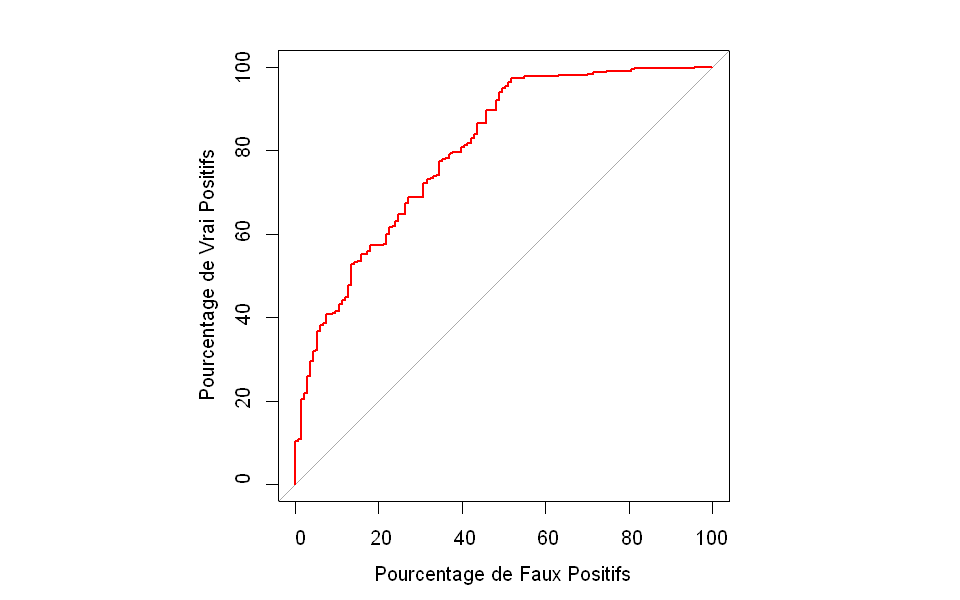

In [147]:
par(pty = 's')
roc <- roc(pret$Loan_Status, score, plot = TRUE, col = 'red', legacy.axes = T, percent = T, xlab = 'Pourcentage de Faux Positifs',
    ylab = 'Pourcentage de Vrai Positifs')
roc

In [148]:
cat(sprintf('En présence de deux demandes de prêt, l\'un accordé l\'autre pas, la probabilité que le modèle désigne correctement le prêt \naccordé correspond à %s%%', round(roc$auc, 1)))

En présence de deux demandes de prêt, l'un accordé l'autre pas, la probabilité que le modèle désigne correctement le prêt 
accordé correspond à 80.1%

<a href="#sommaire">Retour au sommaire</a>
## <span style='color:blue'>2. Test de notation du crédit.<a name="M32"></a>
### <span style='color:brown'>a) Programme.<a name="M321"></a>

In [171]:
accord <- function(fichier) 
{
    for (i in 1:nrow(fichier)) {
        score <- predict(model, fichier[i, -1], type = 'prob')[, 'Y']
        if (score >= 0.5) {
            fichier[i, c('score', 'Loan_Status')] <- c(score, 'Y')}
        else {
            fichier[i, c('score', 'Loan_Status')] <- c(score, 'N')}
    }
    fichier[, c('Loan_ID', 'score', 'Loan_Status')]
}

<a href="#sommaire">Retour au sommaire</a>
### <span style='color:brown'>b) Essai.<a name="M322"></a>

In [172]:
accord(essai[, -13])

,Loan_ID,score,Loan_Status
431,LP002785,0.745089718162566,Y
432,LP002788,0.0780967381534205,N
433,LP002789,0.0902253795550881,N
434,LP002792,0.923326679307856,Y
435,LP002795,0.850150366479991,Y
436,LP002798,0.886047878429072,Y
437,LP002804,0.879389724718855,Y
438,LP002807,0.94553190274359,Y
...,...,...,...
474,LP002964,0.846220629272017,Y


In [173]:
essai

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
431,LP002785,Male,Yes,1,Graduate,No,3333,3250,158,360,1,Urban,Y
432,LP002788,Male,Yes,0,Not Graduate,No,2454,2333,181,360,0,Urban,N
433,LP002789,Male,Yes,0,Graduate,No,3593,4266,132,180,0,Rural,N
434,LP002792,Male,Yes,1,Graduate,No,5468,1032,26,360,1,Semiurban,Y
435,LP002795,Male,Yes,3+,Graduate,Yes,10139,0,260,360,1,Semiurban,Y
436,LP002798,Male,Yes,0,Graduate,No,3887,2669,162,360,1,Semiurban,Y
437,LP002804,Female,Yes,0,Graduate,No,4180,2306,182,360,1,Semiurban,Y
438,LP002807,Male,Yes,2,Not Graduate,No,3675,242,108,360,1,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,LP002964,Male,Yes,2,Not Graduate,No,3987,1411,157,360,1,Rural,Y


In [174]:
confusion <- table(essai$Loan_Status, accord(essai[, -13])$Loan_Status, dnn = c('Actuel', 'Predit'))
confusion

sensibilite <- round(confusion[2, 2]/sum(confusion[2, ])*100, 2)
cat(sprintf("Sensibilité: %s\n", sensibilite))
specificite <- round(confusion[1, 1]/sum(confusion[1, ])*100, 2)
cat(sprintf("Spécificité: %s\n", specificite))
precision <- round(confusion[2, 2]/sum(confusion[, 2])*100, 2)
cat(sprintf("Précision: %s\n", precision))
F_score <- round(2*(precision*sensibilite)/(precision + sensibilite), 2)
cat(sprintf("F-mesure: %s\n", F_score))

      Predit
Actuel  N  Y
     N  8  7
     Y  0 35

Sensibilité: 100
Spécificité: 53.33
Précision: 83.33
F-mesure: 90.91


CCL: Quelques faux positifs comme prévu.

<a href="#sommaire">Retour au sommaire</a>
### <span style='color:brown'>c) Simulation.<a name="M323"></a>

In [175]:
test <- read.csv('Fichier/test.csv', encoding = 'UTF-8')
dim(test)
head(test)

[1] 49 12

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
LP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,NA,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban
LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152,360,1,Urban


In [176]:
summary(test)
str(test)

     Loan_ID      Gender   Married  Dependents        Education  Self_Employed
 LP001015: 1         : 1   No :23     : 1      Graduate    :36      : 4       
 LP001022: 1   Female: 7   Yes:26   0 :31      Not Graduate:13   No :42       
 LP001031: 1   Male  :41            1 : 5                        Yes: 3       
 LP001035: 1                        2 : 9                                     
 LP001051: 1                        3+: 3                                     
 LP001054: 1                                                                  
 (Other) :43                                                                  
 ApplicantIncome CoapplicantIncome   LoanAmount    Loan_Amount_Term
 Min.   :    0   Min.   :    0     Min.   : 28.0   Min.   :180.0   
 1st Qu.: 2478   1st Qu.:    0     1st Qu.:100.0   1st Qu.:360.0   
 Median : 3765   Median : 1500     Median :126.0   Median :360.0   
 Mean   : 4259   Mean   : 1992     Mean   :138.1   Mean   :338.3   
 3rd Qu.: 5400   3rd Qu.: 26

'data.frame':	49 obs. of  12 variables:
 $ Loan_ID          : Factor w/ 49 levels "LP001015","LP001022",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Gender           : Factor w/ 3 levels "","Female","Male": 3 3 3 3 3 3 2 3 3 3 ...
 $ Married          : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 2 1 ...
 $ Dependents       : Factor w/ 5 levels "","0","1","2",..: 2 3 4 4 2 2 3 4 4 2 ...
 $ Education        : Factor w/ 2 levels "Graduate","Not Graduate": 1 1 1 1 2 2 2 2 1 2 ...
 $ Self_Employed    : Factor w/ 3 levels "","No","Yes": 2 2 2 2 2 3 2 2 1 2 ...
 $ ApplicantIncome  : int  5720 3076 5000 2340 3276 2165 2226 3881 13633 2400 ...
 $ CoapplicantIncome: int  0 1500 1800 2546 0 3422 0 0 0 2400 ...
 $ LoanAmount       : int  110 126 208 100 78 152 59 147 280 123 ...
 $ Loan_Amount_Term : int  360 360 360 360 360 360 360 360 240 360 ...
 $ Credit_History   : int  1 1 1 NA 1 1 1 0 1 1 ...
 $ Property_Area    : Factor w/ 3 levels "Rural","Semiurban",..: 3 3 3 3 3 3 2 1 3 2 ...


<a href="#sommaire">Retour au sommaire</a>
### <span style='color:red'>i) Nettoyage des données.<a name="M3231"></a>

In [177]:
test$Credit_History <- droplevels(factor(test$Credit_History))

test <- test[-which(test$Gender == ''), ]
test <- test[-which(test$Dependents == ''), ]
test <- test[-which(test$Self_Employed == ''), ]

test$Gender <- droplevels(as.factor(test$Gender))
test$Dependents <- droplevels(as.factor(test$Dependents))
test$Self_Employed <- droplevels(as.factor(test$Self_Employed))

test <- test[complete.cases(test[, 9:11]), ]
rownames(test) <- 1:nrow(test)
dim(test)

[1] 37 12

In [178]:
# Nombre de doublons après nettoyage:
sum(duplicated(test))
sum(duplicated(test[, -1]))

[1] 0

[1] 0

In [179]:
summary(test)

     Loan_ID      Gender   Married  Dependents        Education  Self_Employed
 LP001015: 1   Female: 7   No :20   0 :27      Graduate    :25   No :34       
 LP001022: 1   Male  :30   Yes:17   1 : 4      Not Graduate:12   Yes: 3       
 LP001031: 1                        2 : 4                                     
 LP001051: 1                        3+: 2                                     
 LP001054: 1                                                                  
 LP001055: 1                                                                  
 (Other) :31                                                                  
 ApplicantIncome CoapplicantIncome   LoanAmount    Loan_Amount_Term
 Min.   :   0    Min.   :    0     Min.   : 28.0   Min.   :180.0   
 1st Qu.:2400    1st Qu.:    0     1st Qu.:100.0   1st Qu.:360.0   
 Median :3276    Median : 1541     Median :125.0   Median :360.0   
 Mean   :3773    Mean   : 2128     Mean   :135.2   Mean   :345.4   
 3rd Qu.:5000    3rd Qu.: 26

<a href="#sommaire">Retour au sommaire</a>
### <span style='color:red'>ii) Test.<a name="M3232"></a>

In [180]:
accord(test)

Loan_ID,score,Loan_Status
LP001015,0.773289988733954,Y
LP001022,0.764141200177223,Y
LP001031,0.823642362263827,Y
LP001051,0.678697271155592,Y
LP001054,0.748737767631716,Y
LP001055,0.858169543761897,Y
LP001056,0.150628378617232,N
LP001067,0.831222573500111,Y
...,...,...
LP001219,0.635249587007604,Y


In [181]:
table(accord(test)$Loan_Status)


 N  Y 
 3 34 

In [188]:
test[test$Loan_Status == 'N', ]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147,360,0,Rural,N
20,LP001153,Male,No,0,Graduate,No,0,24000,148,360,0,Rural,N
28,LP001203,Male,No,0,Graduate,No,3150,0,176,360,0,Semiurban,N


In [190]:
test[test$Credit_History == 0, ]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147,360,0,Rural,N
20,LP001153,Male,No,0,Graduate,No,0,24000,148,360,0,Rural,N
28,LP001203,Male,No,0,Graduate,No,3150,0,176,360,0,Semiurban,N


### Vérification graphique:

In [182]:
test <- cbind(test, Loan_Status = as.factor(accord(test)$Loan_Status))
verif <- rbind(test, train)
rownames(verif) <- verif$Loan_ID
verif <- verif[, -1]
dim(verif)
head(verif)

[1] 467  12

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban,Y
LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban,Y
LP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban,Y
LP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban,Y
LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152,360,1,Urban,Y
LP001055,Female,No,1,Not Graduate,No,2226,0,59,360,1,Semiurban,Y


In [183]:
viz <- MCA(verif, ncp = 4, quanti.sup = 6:9, quali.sup = 12, ind.sup = 1:nrow(test))

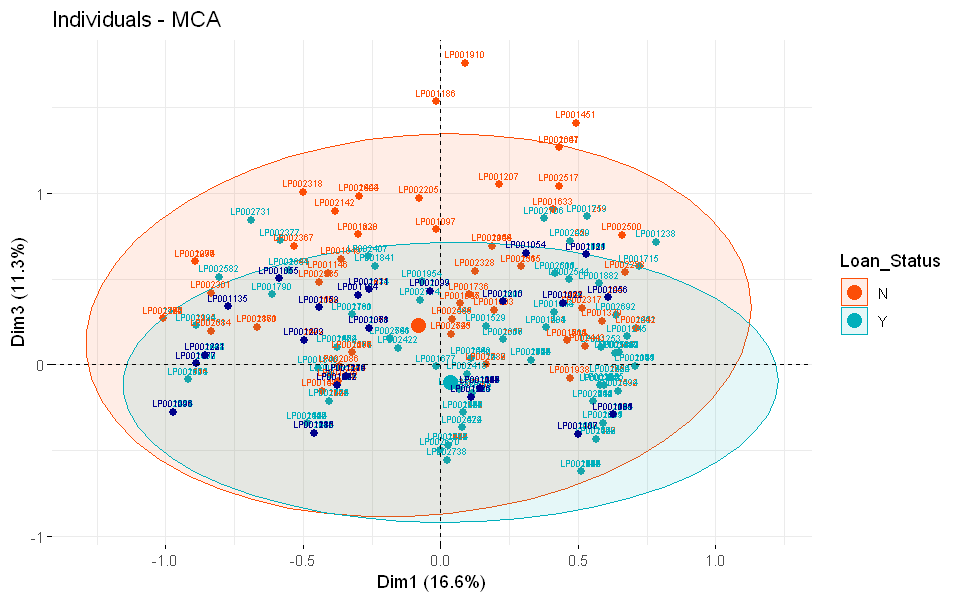

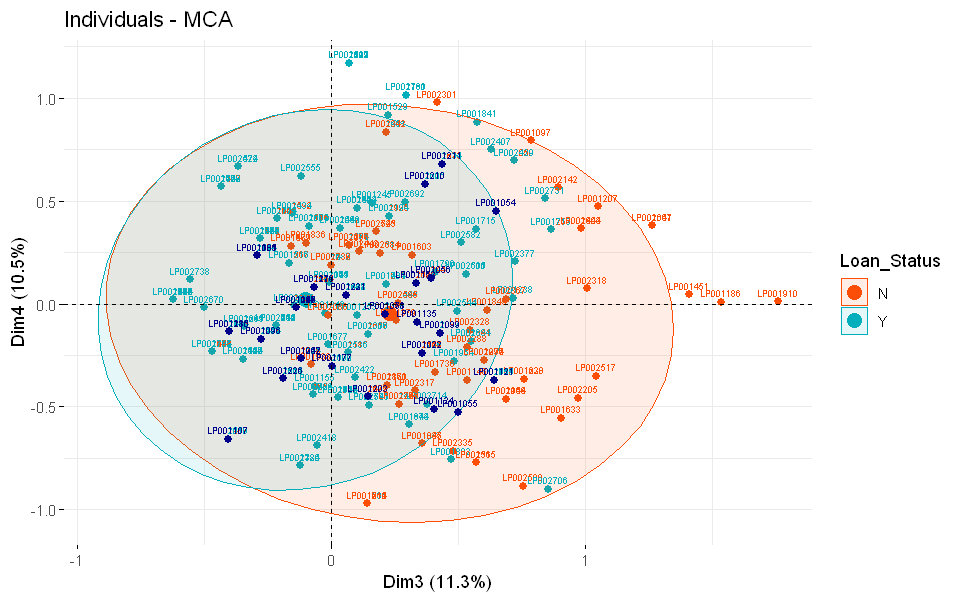

In [184]:
# Graphes des modalités et des individus:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_mca_ind (viz, axes = c(1, 3), geom = c('point', 'text'), habillage = 12, pointsize = 2, labelsize = 2, 
              palette = c("#FC4E07", "#00AFBB"), addEllipses = T, ellipse.level = 0.95, repel = F)

fviz_mca_ind (viz, axes = c(3, 4), geom = c('point', 'text'), habillage = 12, pointsize = 2, labelsize = 2, 
              palette = c("#FC4E07", "#00AFBB"), addEllipses = T, ellipse.level = 0.95, repel = F)

<a href="#sommaire">Retour au sommaire</a>

La banque pourra éventuellement proposer un rendez_vous à toutes les demandes qui ont intégrer l'ellipse bleu sans être trop proches du centre de l'ellipse rouge.
Plus restrictivement, elle pourra les choisir en fonction de leur position sur les graphes: en dessous de l'axe des abscisses pour le graphe du haut et à gauche de l'axe des ordonnées pour le graphe du bas.